In [3]:
!pip install pathlib

In [4]:
import matplotlib.pyplot as plt
import pandas            as pd
import numpy             as np
import cv2
import pydicom
import os
import skimage

from pathlib             import Path

plt.rcParams["figure.figsize"] = (22, 20)

In [7]:
META_PATH = r"D:\Breast-Cancer\Notebook\MINI-DDSM-Complete\DataWMask.xlsx"
IMG_ROOT = r"D:\Breast-Cancer\Notebook\MINI-DDSM-Complete\MINI-DDSM-Complete-JPEG-8"



In [8]:
df =  pd.read_excel(META_PATH)

In [9]:
Full_Windows_Path = [] 

for i in range(len(df["fullPath"])):
    img_path = df["fullPath"][i]#.replace("\\","/")
    img_fullpath = os.path.join(IMG_ROOT+"\\"+img_path)
    Full_Windows_Path.append(img_fullpath)

In [10]:
df2 =df.copy()
df2["Full_Windows_Path"]= Full_Windows_Path

In [11]:
patient_id=[]
for i in range(len(df2["fileName"])):
    patient_id_path= df2["fileName"][i].split("_")
    cc = patient_id_path[0] + patient_id_path[1]
#     print("filename : ",df2["fileName"][i], ".. Patient id : ", cc)
    patient_id.append(cc)

In [12]:
df2["patient_id"]=patient_id

### Creating data according to features such as view, status, side, mask and full image/mask

In [13]:
## Right and Left View

df_Left= df2[df2["Side"]=="LEFT"].reset_index(drop=True)
df_Right = df2[df2["Side"]=="RIGHT"].reset_index(drop=True)

In [14]:
## individual classes of data Normal, Benign and Cancer


df_benign= df2[df2["Status"]=="Benign"].reset_index(drop=True)
df_cancer= df2[df2["Status"]=="Cancer"].reset_index(drop=True)
df_normal= df2[df2["Status"]=="Normal"].reset_index(drop=True)


cancer_data_fullpath = list(df_cancer['Full_Windows_Path'])
normal_data_fullpath = list(df_normal['Full_Windows_Path']) 
benign_data_fullpath = list(df_benign['Full_Windows_Path']) 

### Creating CC -- MLO view Specific data and classes accordingly

In [15]:
view_cc= df2[df2["View"]=="CC"].reset_index(drop=True)
view_mlo= df2[df2["View"]=="MLO"].reset_index(drop=True)

mlo_data= {}
mlo_data["fullpath"] = list(view_mlo['Full_Windows_Path'])
mlo_data["Status"]=list(view_mlo['Status'])

cc_data = {}
cc_data["fullpath"] = list(view_cc['Full_Windows_Path'])
cc_data["Status"]=list(view_cc['Status'])



In [16]:
## Creating classes per view.

## Classes according to CC View

cc_cancer =[]
cc_normal= []
cc_benign= []


for i in range(len(cc_data["Status"])):
    if cc_data["Status"][i]== "Normal":
        cc_normal.append(cc_data["fullpath"][i])
    
    elif cc_data["Status"][i]== "Cancer":
        cc_cancer.append(cc_data["fullpath"][i])

    elif cc_data["Status"][i]== "Benign":
        cc_benign.append(cc_data["fullpath"][i])
    else:
        print ("problem")

    
    # print(i)

In [17]:
## Classes according to MLO View

mlo_cancer =[]
mlo_normal= []
mlo_benign= []


for i in range(len(mlo_data["Status"])):
    if mlo_data["Status"][i]== "Normal":
        mlo_normal.append(mlo_data["fullpath"][i])
    
    elif mlo_data["Status"][i]== "Cancer":
        mlo_cancer.append(mlo_data["fullpath"][i])

    elif mlo_data["Status"][i]== "Benign":
        mlo_benign.append(mlo_data["fullpath"][i])
    else:
        print ("problem")

### Mask Data, path to full image and patient ID

In [18]:
## Create a Mask View

df_mask=df2[df2["Tumour_Contour"].notnull()].reset_index(drop=True)

## FUll WIndows Path

mask_fullpath_windows=[]
for i in range(len(df_mask["Tumour_Contour"])):
    mask_path= df_mask["Tumour_Contour"][i]#.replace("\\","/")
    mask_fullpath = os.path.join(IMG_ROOT+"\\"+ mask_path)
    mask_fullpath_windows.append(mask_fullpath)


    
df_mask["mask_fullpath_windows"] = mask_fullpath_windows


In [19]:

df_mask.head(1)

,fullPath,fileName,View,Side,Status,Tumour_Contour,Tumour_Contour2,Age,Density,Full_Windows_Path,patient_id,mask_fullpath_windows
0,Cancer\1000\A_1000_1.LEFT_CC.jpg,A_1000_1.LEFT_CC.jpg,CC,LEFT,Cancer,Cancer\1000\A_1000_1.LEFT_CC_Mask.jpg,NaN,46.0,3,D:\Breast-Cancer\Notebook\MINI-DDSM-Complete\M...,A1000,D:\Breast-Cancer\Notebook\MINI-DDSM-Complete\M...


In [20]:
mask_data= {}
mask_data["fullpath"] = list(df_mask['Full_Windows_Path'])
mask_data["Status"]=list(df_mask['Status'])
mask_data["View"] = list(df_mask['View'])
mask_data["Side"] = list(df_mask['Side'])
mask_data["mask_path"]= list(df_mask['Tumour_Contour'])


In [21]:
mask_data["Status"][:5]

['Cancer', 'Cancer', 'Benign', 'Benign', 'Benign']

In [ ]:
# for i in range(len(mask_data["View"])):
#     if mask_data["View"][i]=="MLO":
#         print(mask_data["mask_path"][i])

In [ ]:

# for i in range(len(df_mask["Status"])):
#     if df_mask["Status"][i] =="Cancer":
#         print(df_mask["Full_Windows_Path"][i])
#         print(df_mask["mask_fullpath_windows"][i])

In [23]:
for i in range (5):
    if df_mask["Status"][i] =="Benign":
        print("Benign Patient ID", patient_id[i])
        print ("Benign Full Mammogram")
        print (Full_Windows_Path[i])
        print( "Benign Mask")
        print(mask_fullpath_windows[i])
        print ()
        print ()
    
    elif df_mask["Status"][i] =="Cancer":
        print("Cancer Patient ID", patient_id[i])
        print ("Cancer Full Mammogram")
        print (Full_Windows_Path[i])
        print( "Cancer Mask")
        print(mask_fullpath_windows[i])
        print ()
        print ()

Cancer Patient ID A0002
Cancer Full Mammogram
D:\Breast-Cancer\Notebook\MINI-DDSM-Complete\MINI-DDSM-Complete-JPEG-8\Normal\0002\A_0002_1.LEFT_CC.jpg
Cancer Mask
D:\Breast-Cancer\Notebook\MINI-DDSM-Complete\MINI-DDSM-Complete-JPEG-8\Cancer\1000\A_1000_1.LEFT_CC_Mask.jpg


Cancer Patient ID A0002
Cancer Full Mammogram
D:\Breast-Cancer\Notebook\MINI-DDSM-Complete\MINI-DDSM-Complete-JPEG-8\Normal\0002\A_0002_1.LEFT_MLO.jpg
Cancer Mask
D:\Breast-Cancer\Notebook\MINI-DDSM-Complete\MINI-DDSM-Complete-JPEG-8\Cancer\1000\A_1000_1.LEFT_MLO_Mask.jpg


Benign Patient ID A0002
Benign Full Mammogram
D:\Breast-Cancer\Notebook\MINI-DDSM-Complete\MINI-DDSM-Complete-JPEG-8\Normal\0002\A_0002_1.RIGHT_CC.jpg
Benign Mask
D:\Breast-Cancer\Notebook\MINI-DDSM-Complete\MINI-DDSM-Complete-JPEG-8\Benign\1123\A_1123_1.LEFT_CC_Mask.jpg


Benign Patient ID A0002
Benign Full Mammogram
D:\Breast-Cancer\Notebook\MINI-DDSM-Complete\MINI-DDSM-Complete-JPEG-8\Normal\0002\A_0002_1.RIGHT_MLO.jpg
Benign Mask
D:\Breast-Canc

In [28]:
from matplotlib import pyplot as plt

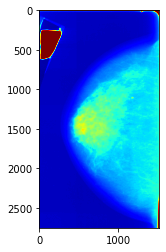

In [39]:
img=cv2.imread(Full_Windows_Path[1220],0)
plt.imshow(img, cmap= "jet")

        

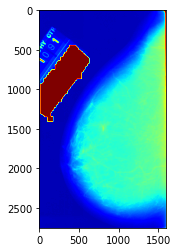

In [38]:
img=cv2.imread(Full_Windows_Path[220],0)
plt.imshow(img, cmap= "jet")

        

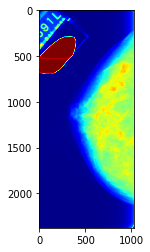

In [37]:
img=cv2.imread(Full_Windows_Path[200],0)
plt.imshow(img, cmap= "jet")

        

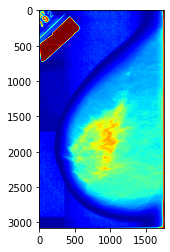

In [36]:
img=cv2.imread(Full_Windows_Path[1200],0)
plt.imshow(img, cmap= "jet")

        

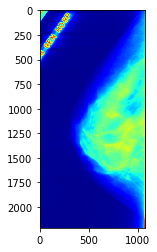

In [35]:
img=cv2.imread(Full_Windows_Path[100],0)
plt.imshow(img, cmap= "jet")

        

### Creating Functions to remove background artefacts, background light/noise, crop edges, enhance contrast... and more... 

#### Copying all functions from Processing Image notebook to organize and to create better steps in the process

In [20]:
def MinMaxNormalise(img):
    
    '''
    This function does min-max normalisation on
    the given image.
    
    Parameters
    ----------
    img : {numpy.ndarray}
        The image to normalise.
        
    Returns
    -------
    norm_img: {numpy.ndarray}
        The min-max normalised image.
    '''
    
    norm_img = (img - img.min()) / (img.max() - img.min())
    
    return norm_img

In [21]:
### For 3 Dim Images
def CropBorders(img):
    
    '''
    This function crops 1% from all four sides of the given
    image. 3 Dim images
    
    Parameters
    ----------
    img : {numpy.ndarray}
        The image to crop.
        
    Returns
    -------
    cropped_img: {numpy.ndarray}
        The cropped image.
    '''
    nrows, ncols,channel = img.shape

    # Get the start and end rows and columns
    l_crop = int(ncols * 0.01)
    r_crop = int(ncols * (1 - 0.04))
    u_crop = int(nrows * 0.01)
    d_crop = int(nrows * (1 - 0.04))

    cropped_img = img[u_crop:d_crop, l_crop:r_crop]
    
    return cropped_img

In [22]:
## Crop borders of 1 dim images


def CropBorders2(img):
    
    '''
    This function crops 1% from all four sides of the given
    image.
    
    Parameters
    ----------
    img : {numpy.ndarray}
        The image to crop.
        
    Returns
    -------
    cropped_img: {numpy.ndarray}
        The cropped image.
    '''
    nrows, ncols = img.shape

    # Get the start and end rows and columns
    l_crop = int(ncols * 0.01)
    r_crop = int(ncols * (1 - 0.04))
    u_crop = int(nrows * 0.01)
    d_crop = int(nrows * (1 - 0.04))

    cropped_img = img[u_crop:d_crop, l_crop:r_crop]
    
    return cropped_img

In [23]:
def ShowHist255(img, ignore_zero = False):
    hist, bin_edges = np.histogram(img, bins=255, density=False)
    
    if ignore_zero:
        plt.plot(bin_edges[1:-1], hist[1:])
    else:
        plt.plot(bin_edges[0:-1], hist)
        
    plt.show()

In [24]:
## Using Global Thresholding, Otsu Thresholding, adpative Thresholding with Mean_C and Gaussian_C Metods


def Binarisation(img, maxval, show=False):
    
    # First convert image to uint8.
    img = skimage.img_as_ubyte(img)
    
    thresh, th1 = cv2.threshold(src=img,
                                thresh=0.1,
                                maxval=maxval,
                                type=cv2.THRESH_BINARY) # Global thresholding
    
    otsu_thresh, th2 = cv2.threshold(src=img,
                                     thresh=0.0,
                                     maxval=maxval,
                                     type=cv2.THRESH_BINARY+cv2.THRESH_OTSU) # Otsu's thresholding

    th3 = cv2.adaptiveThreshold(src=img,
                                maxValue=maxval,
                                adaptiveMethod=cv2.ADAPTIVE_THRESH_MEAN_C,
                                thresholdType=cv2.THRESH_BINARY,
                                blockSize=9,
                                C=-1)
    
    th4 = cv2.adaptiveThreshold(src=img,
                                maxValue=maxval,
                                adaptiveMethod=cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                thresholdType=cv2.THRESH_BINARY,
                                blockSize=9,
                                C=-1)

    images = [img, th1, th2, th3, th4]
    titles = ['Original Image',
              'Global Thresholding (v = 0.1)',
              'Global Thresholding (otsu)',
              'Adaptive Mean Thresholding',
              'Adaptive Gaussian Thresholding']

    
    # --- Plot the different thresholds ---
    if show:
        fig, ax = plt.subplots(nrows=1, ncols=5, figsize = (22, 5))

        for i in range(5):
            ax[i].imshow(images[i], cmap="gray")
            ax[i].set_title(titles[i])
        plt.show()
    
    return th1, th2, th3, th4



In [25]:
## Dilating masks
def DilateMask(mask):
    
    # Dilate mask
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
    dilated_mask = cv2.morphologyEx(mask, cv2.MORPH_DILATE, kernel)
    
    return dilated_mask

In [26]:
### Applying mask
def ApplyMask(img, dilated_mask):

    # Apply change
    result = img.copy()
    result[dilated_mask == 0] = 0 # We only keep areas that are white (255)
    
    return result

In [27]:
def OwnGlobalBinarise(img, thresh, maxval):
    
    '''
    This function takes in a numpy array image and
    returns a corresponding mask that is a global
    binarisation on it based on a given threshold
    and maxval. Any elements in the array that is
    greater than or equals to the given threshold
    will be assigned maxval, else zero.
    
    Parameters
    ----------
    img : {numpy.ndarray}
        The image to perform binarisation on.
    thresh : {int or float}
        The global threshold for binarisation.
    maxval : {np.uint8}
        The value assigned to an element that is greater
        than or equals to `thresh`.
        
        
    Returns
    -------b
    binarised_img : {numpy.ndarray, dtype=np.uint8}
        A binarised image of {0, 1}.
    '''
    
    binarised_img = np.zeros(img.shape, np.uint8)
    binarised_img[img >= thresh] = maxval
    
    return binarised_img

In [28]:
def SortContoursByArea(contours, reverse=True):
    
    '''
    This function takes in list of contours, sorts them based
    on contour area, computes the bounding rectangle for each
    contour, and outputs the sorted contours and their
    corresponding bounding rectangles.
    
    Parameters
    ----------
    contours : {list}
        The list of contours to sort.
        
    Returns
    -------
    sorted_contours : {list}
        The list of contours sorted by contour area in descending
        order.
    bounding_boxes : {list}
        The list of bounding boxes ordered corresponding to the
        contours in `sorted_contours`.
    '''
    
    # Sort contours based on contour area.
    sorted_contours = sorted(contours, key=cv2.contourArea, reverse=True)
    
    # Construct the list of corresponding bounding boxes.
    bounding_boxes = [cv2.boundingRect(c) for c in sorted_contours]
    
    return sorted_contours, bounding_boxes

In [29]:
def DrawContourID(img, bounding_box, contour_id):
    
    '''
    This function draws the given contour and its ID on the given
    image. The image with the drawn contour is returned.
    
    Parameters
    ----------
    img: {numpy.ndarray}
        The image to draw the contour on.
    bounding_box : {tuple of int}
        The bounding_rect of the given contour.
    contour_id : {int or float}
        The corresponding ID of the given `contour`.
        
    Returns
    -------
    img : {numpy.ndarray}
        The image after the `contour` and its ID is drawn on.
    '''
    
    # Center of bounding_rect.
    x, y, w, h = bounding_box
    center = ( ((x + w) // 2), ((y + h) // 2) )
    
    # Draw the countour number on the image
    cv2.putText(img=img,
                text=f"{contour_id}",
                org=center, # Bottom-left corner of the text string in the image.
                fontFace=cv2.FONT_HERSHEY_SIMPLEX,
                fontScale=10, 
                color=(255, 255, 255),
                thickness=40)

    return img

In [30]:
def XLargestBlobs(mask, top_X=1):
    
    '''
    This function finds contours in the given image and
    keeps only the top X largest ones.
    
    Parameters
    ----------
    mask : {numpy.ndarray, dtype=np.uint8}
        The mask to get the top X largest blobs.
    top_X : {int}
        The top X contours to keep based on contour area
        ranked in decesnding order.
        
        
    Returns
    -------
    n_contours : {int}
        The number of contours found in the given `mask`.
    X_largest_blobs : {numpy.ndarray}
        The corresponding mask of the image containing only
        the top X largest contours in white.
    '''
        
    # Find all contours from binarised image.
    # Note: parts of the image that you want to get should be white.
    contours, hierarchy = cv2.findContours(image=mask,
                                           mode=cv2.RETR_EXTERNAL,
                                           method=cv2.CHAIN_APPROX_NONE)
    
    n_contours = len(contours)
    
    # Only get largest blob if there is at least 1 contour.
    if n_contours > 0:
        
        # Make sure that the number of contours to keep is at most equal 
        # to the number of contours present in the mask.
        if n_contours < top_X or top_X == None:
            top_X = n_contours
        
        # Sort contours based on contour area.
        sorted_contours, bounding_boxes = SortContoursByArea(contours=contours,
                                                             reverse=True)
        
        # Get the top X largest contours.
        X_largest_contours = sorted_contours[0:top_X]
        
        # Create black canvas to draw contours on.
        to_draw_on = np.zeros(mask.shape, np.uint8)
        
        # Draw contours in X_largest_contours.
        X_largest_blobs = cv2.drawContours(image=to_draw_on, # Draw the contours on `to_draw_on`.
                                           contours=X_largest_contours, # List of contours to draw.
                                           contourIdx=-1, # Draw all contours in `contours`.
                                           color=1, # Draw the contours in white.
                                           thickness=-1) # Thickness of the contour lines.
        
    return n_contours, X_largest_blobs

In [31]:
def InvertMask(mask):
    
    '''
    This function inverts a given mask (i.e. 0 -> 1
    and 1 -> 0).
    
    Parameters
    ----------
    mask : {numpy.ndarray, dtype=np.uint8}
        The mask to invert.
        
    Returns
    -------
    inverted_mask: {numpy.ndarray}
        The inverted mask.
    '''
    
    inverted_mask = np.zeros(mask.shape, np.uint8)
    inverted_mask[mask == 0] = 1
    
    return inverted_mask

In [32]:
### flags= Navier-Stokes or  Alexandru Telea (NS) or (Tealea) based method.
### https://docs.opencv.org/4.x/d7/d8b/group__photo__inpaint.html


def InPaint(img, mask, flags="telea", inpaintRadius=30):

    '''
    This function restores an input image in areas indicated
    by the given mask (elements with 1 are restored). 
    
    Parameters
    ----------
    img : {numpy.ndarray}
        The image to restore.
    mask : {numpy.ndarray, dtype=np.uint8}
        The mask that indicates where (elements == 1) in the
        `img` the damage is.
    inpaintRadius : {int}
        Radius of a circular neighborhood of each point
        inpainted that is considered by the algorithm.
        
    Returns
    -------
    inpainted_img: {numpy.ndarray}
        The restored image.
    '''
    
    # First convert to `img` from float64 to uint8.
    img = 255 * img
    img = img.astype(np.uint8)
    
    # Then inpaint based on flags.
    if flags == "telea":
        inpainted_img = cv2.inpaint(src=img,
                                    inpaintMask=mask,
                                    inpaintRadius=inpaintRadius,
                                    flags=cv2.INPAINT_TELEA)
    elif flags == "ns":
        inpainted_img = cv2.inpaint(src=img,
                                    inpaintMask=mask,
                                    inpaintRadius=inpaintRadius,
                                    flags=cv2.INPAINT_NS)
    
    return inpainted_img

In [33]:
def ApplyMask(img, mask):
    
    '''
    This function applies a mask to a given image. White
    areas of the mask are kept, while black areas are
    removed.
    
    Parameters
    ----------
    img : {numpy.ndarray}
        The image to mask.
    mask : {numpy.ndarray, dtype=np.uint8}
        The mask to apply.
        
    Returns
    -------
    masked_img: {numpy.ndarray}
        The masked image.
    '''
    
    masked_img = img.copy()
    masked_img[mask == 0] = 0
    
    return masked_img

In [34]:
def ApplyMask1(img, mask):
    
    '''
    This function applies a mask to a given image. White
    areas of the mask are kept, while black areas are
    removed.
    
    Parameters
    ----------
    img : {numpy.ndarray}
        The image to mask.
    mask : {numpy.ndarray, dtype=np.uint8}
        The mask to apply.
        
    Returns
    -------
    masked_img: {numpy.ndarray}
        The masked image.
    '''
    
    masked_img = img.copy()
    masked_img[mask == 0] = 1
    
    return masked_img

In [35]:
## Do not add channel

def checkLRFlip(mask):

    # Get number of rows and columns in the image.
    nrows, ncols = mask.shape
    x_center = ncols // 2
    y_center = nrows // 2

    # Sum down each column.
    col_sum = mask.sum(axis=0)
    # Sum across each row.
    row_sum = mask.sum(axis=1)

    left_sum = sum(col_sum[0:x_center])
    right_sum = sum(col_sum[x_center:-1])

    if left_sum < right_sum:
        LR_flip = True
    else:
        LR_flip = False

    return LR_flip


def makeLRFlip(img):

    flipped_img = np.fliplr(img)

    return flipped_img

In [36]:
def clahe(img, clip=2.0, tile=(8, 8)):
    
    '''
    This function applies the Contrast-Limited Adaptive
    Histogram Equalisation filter to a given image.
    
    Parameters
    ----------
    img : {numpy.ndarray}
        The image to edit.
    clip : {int or floa}
        Threshold for contrast limiting.
    tile : {tuple (int, int)}
        Size of grid for histogram equalization. Input
        image will be divided into equally sized
        rectangular tiles. `tile` defines the number of
        tiles in row and column.
    
    Returns
    -------
    clahe_img : {numpy.ndarray}
        The edited image.
    '''
    
    # Convert to uint8.
    # img = skimage.img_as_ubyte(img)
    img = cv2.normalize(
        img,
        None,
        alpha=0,
        beta=255,
        norm_type=cv2.NORM_MINMAX,
        dtype=cv2.CV_32F,
    )
    img_uint8 = img.astype("uint8")

    clahe_create = cv2.createCLAHE(clipLimit=clip, tileGridSize=tile)
    clahe_img = clahe_create.apply(img_uint8)

    return clahe_img

In [37]:
def EditMask( mask, ksize=(23, 23), operation="open"):

    kernel = cv2.getStructuringElement(shape=cv2.MORPH_RECT, ksize=ksize)

    if operation == "open":
        edited_mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)
    elif operation == "close":
        edited_mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)

    # Then dilate
    edited_mask = cv2.morphologyEx(edited_mask, cv2.MORPH_DILATE, kernel)

    return edited_mask

In [38]:

    
def pad(img):
    '''
    This function pads a given image with black pixels,
    along its shorter side, into a square and returns
    the square image.

    If the image is portrait, black pixels will be
    padded on the right to form a square.

    If the image is landscape, black pixels will be
    padded on the bottom to form a square.

    Parameters
    ----------
    img : {numpy.ndarray}
    The image to pad.

    Returns
    -------
    padded_img : {numpy.ndarray}
    The padded square image, if padding was required
    and done.
    img : {numpy.ndarray}
    The original image, if no padding was required.
'''

    
    nrows, ncols = img.shape

    # If padding is required...
    if nrows != ncols:

        # Take the longer side as the target shape.
        if ncols < nrows:
            target_shape = (nrows, nrows)
        elif nrows < ncols:
            target_shape = (ncols, ncols)

        # pad.
        padded_img = np.zeros(shape=target_shape)
        padded_img[:nrows, :ncols] = img

    # If padding is not required...
    elif nrows == ncols:

        # Return original image.
        padded_img = img

    return padded_img

In [39]:
def maskPreprocess(mask, lr_flip):

    # Step 1: Initial crop.
    mask = CropBorders2(img=mask)

    # Step 2: Horizontal flip.
    if lr_flip:
        mask = makeLRFlip(img=mask)

    # Step 3: Pad.
    mask_pre = pad(img=mask)

    return mask_pre


""" As part of preprocessing the masks, we need to sum the masks of mammograms that contain more than one mass abnormalities """


def sumMasks(logger, mask_list):

    summed_mask = np.zeros(mask_list[0].shape)

    for arr in mask_list:
        summed_mask = np.add(summed_mask, arr)

    # Binarise (there might be some overlap, resulting in pixels with
    # values of 510, 765, etc...)
    _, summed_mask_bw = cv2.threshold(
        src=summed_mask, thresh=1, maxval=255, type=cv2.THRESH_BINARY
    )

    return summed_mask_bw

# 

# 

# 

In [40]:
ksize=33
operation="open" ## options are "open or close"
top_x =1 ## Conture
reverse= True
thresh= .1
maxval=1
clip =2
tile=8
dsize= 800 ### Resizing data 

In [41]:
mask_data.keys()

dict_keys(['fullpath', 'Status', 'View', 'Side', 'mask_path'])

In [42]:
# cancer_data_fullpath
# normal_data_fullpath
# benign_data_fullpath

In [43]:
# arr =[]
# arr_masks = []
# label= []
# # arr_patient_id=[]

# for i in range(len(df_mask["Full_Windows_Path"])):
#     if df_mask["Status"][i] =="Cancer":
        
#         arr.append(df_mask["Full_Windows_Path"][i])
#         arr_masks.append(df_mask["mask_fullpath_windows"][i])
    

In [44]:
processed_img =[]
label=[]

In [45]:
# ## Writting processed files.

# for i in range(10):
#     img_path= cancer_data_fullpath[i]
#     # category=img_path.split('\\')[7]
#     patient_no=img_path.split('\\')[8]
#     file_name=img_path.split('\\')[9]
#     path= r"D:\Breast-Cancer\Processed\Full_mamogram\Cancer"
#     img= processed_img[i]
#     print(i,"--",patient_no,"--",file_name)
#     write=cv2.imwrite(os.path.join(path , f"{file_name}"), img)
#     if write == False:
#         print(i, "----", write)

#     # path= os.path.join(path, file_name)

#     #     save_path.append(file_name)

    
# #     print(i,"----", img.shape)
# #     print(i, "---", path)

In [49]:
### Cancer
## Change path for each class (Cancer, Normal, Benign)
##change dsize to change size of image


dsize= 3200
path= r"D:\Breast-Cancer\Processed\Full_mamogram\Cancer"


for i in range(len(cancer_data_fullpath)):
    ### Change Image_path file for each class
   
    image_path=cancer_data_fullpath[i]
    
    clip = 2.0
    tile = 8
    
    
    ### read images
    full_mamogram=[]
    a= cv2.imread(image_path,0)
    full_mamogram.append(a)
  
    
    # Crop images
    cropped_img2=[]

    crop_img= CropBorders2(full_mamogram[0])
    cropped_img2.append(crop_img)
    
    ## Normalize Image
    norm_img2= [MinMaxNormalise(img) for img in cropped_img2]
    
    
    ## Binarize Image
    binarised_image= [OwnGlobalBinarise(img=img, thresh=0.1, maxval=1.0) for img in norm_img2]
    
    ## Edited mask
  
    edited_mask= [EditMask(mask= mask, ksize=(ksize, ksize), operation=operation ) for mask in binarised_image]

    
    ## Largest Blob
    xlargest_mask =[]
    _, X_largest_blobs = XLargestBlobs(mask=edited_mask[0], top_X=1)
    xlargest_mask.append(X_largest_blobs)
#     print(i,"--Blog--",X_largest_blobs.shape)

    
    ## Apply Mask
    masked_img = []
    applymask= ApplyMask(img=norm_img2[0], mask=xlargest_mask[0])
    masked_img.append(applymask)
    
    
    ## FLip images
    lr_flip = []
    flip= checkLRFlip(mask=xlargest_mask[0])
#     print(i,"--", flip)
    if flip ==True:
        flipped_img = makeLRFlip(img=masked_img[0])
        lr_flip.append(flipped_img)
#         print(i,"--True :", flip)
    elif flip ==False:
        flipped_img = masked_img[0]
        lr_flip.append (flipped_img)
        
    
    ## CLAHE Image
    clahe_img = [clahe(img, clip=clip, tile=(tile, tile)) for img in lr_flip]
    
    
    ## pad images
    padded_img= [ pad(img) for img in clahe_img]
    
    
    ## Normalize Padd Images
    padded_img=[cv2.normalize(img, None, alpha=0,beta=255, 
                          norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F) for img in padded_img]
    
    ## Min max Normalize
    img_pre = [MinMaxNormalise(img) for img in padded_img]
    
    
    ## resizing
    img_pre= [cv2.resize(img, (dsize,dsize)) for img in img_pre]
    
    ## Creating label and appending image to a list
    
#     processed_img.append(img_pre[0]) 
#     label.append(1)
    
    ### Saving Image 
    ### --- create path
    img_path= image_path
    # category=img_path.split('\\')[7]
    patient_no=img_path.split('\\')[8]
    file_name=img_path.split('\\')[9]
    
    ## Write
    final_img=img_pre[0] *255
    write=cv2.imwrite(os.path.join(path ,f"{file_name}"), final_img)
    if write == False:
        print(i,"--", file_name, img_pre[0].shape)
        print(i, "----", write)

print("Done")

Done


In [51]:
# #### Normal

# ## Change path for each class (Cancer, Normal, Benign)
# ##change dsize to change size of image

# dsize= 3200

# path= r"D:\Breast-Cancer\Processed\Full_mamogram\Normal"




# for i in range(len(normal_data_fullpath)):
#     ### Change Image_path file for each class
    
#     image_path=normal_data_fullpath[i]
    
#     clip = 2.0
#     tile = 8
    
    
#     ### read images
#     full_mamogram=[]
#     a= cv2.imread(image_path,0)
#     full_mamogram.append(a)
  
    
#     # Crop images
#     cropped_img2=[]

#     crop_img= CropBorders2(full_mamogram[0])
#     cropped_img2.append(crop_img)
    
#     ## Normalize Image
#     norm_img2= [MinMaxNormalise(img) for img in cropped_img2]
    
    
#     ## Binarize Image
#     binarised_image= [OwnGlobalBinarise(img=img, thresh=0.1, maxval=1.0) for img in norm_img2]
    
#     ## Edited mask
  
#     edited_mask= [EditMask(mask= mask, ksize=(ksize, ksize), operation=operation ) for mask in binarised_image]

    
#     ## Largest Blob
#     xlargest_mask =[]
#     _, X_largest_blobs = XLargestBlobs(mask=edited_mask[0], top_X=1)
#     xlargest_mask.append(X_largest_blobs)
# #     print(i,"--Blog--",X_largest_blobs.shape)

    
#     ## Apply Mask
#     masked_img = []
#     applymask= ApplyMask(img=norm_img2[0], mask=xlargest_mask[0])
#     masked_img.append(applymask)
    
    
#     ## FLip images
#     lr_flip = []
#     flip= checkLRFlip(mask=xlargest_mask[0])
# #     print(i,"--", flip)
#     if flip ==True:
#         flipped_img = makeLRFlip(img=masked_img[0])
#         lr_flip.append(flipped_img)
# #         print(i,"--True :", flip)
#     elif flip ==False:
#         flipped_img = masked_img[0]
#         lr_flip.append (flipped_img)
        
    
#     ## CLAHE Image
#     clahe_img = [clahe(img, clip=clip, tile=(tile, tile)) for img in lr_flip]
    
    
#     ## pad images
#     padded_img= [ pad(img) for img in clahe_img]
    
    
#     ## Normalize Padd Images
#     padded_img=[cv2.normalize(img, None, alpha=0,beta=255, 
#                           norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F) for img in padded_img]
    
#     ## Min max Normalize
#     img_pre = [MinMaxNormalise(img) for img in padded_img]
    
    
#     ## Resizing
#     img_pre= [cv2.resize(img, (dsize,dsize)) for img in img_pre]
    
#     ## Creating label and appending image to a list
    
# #     processed_img.append(img_pre[0]) 
# #     label.append(1)
    
#     ### Saving Image 
#     ### --- create path
#     final_img=img_pre[0] *255
#     img_path= image_path
#     # category=img_path.split('\\')[7]
#     patient_no=img_path.split('\\')[8]
#     file_name=img_path.split('\\')[9]
    
#     ## Write
#     write=cv2.imwrite(os.path.join(path ,f"{file_name}"), final_img)
#     if write == False:
#         print(i,"--", file_name, img_pre[0].shape)
#         print(i, "----", write)
        
# print("Done")


Done


In [50]:
# #### Benign

# ## Change path for each class (Cancer, Normal, Benign)
# ##change dsize to change size of image

# dsize= 3200

# path= r"D:\Breast-Cancer\Processed\Full_mamogram\Benign"




# for i in range(len(benign_data_fullpath)):
#     ### Change Image_path file for each class
    
#     image_path=benign_data_fullpath[i]
    
#     clip = 2.0
#     tile = 8
    
    
#     ### read images
#     full_mamogram=[]
#     a= cv2.imread(image_path,0)
#     full_mamogram.append(a)
  
    
#     # Crop images
#     cropped_img2=[]

#     crop_img= CropBorders2(full_mamogram[0])
#     cropped_img2.append(crop_img)
    
#     ## Normalize Image
#     norm_img2= [MinMaxNormalise(img) for img in cropped_img2]
    
    
#     ## Binarize Image
#     binarised_image= [OwnGlobalBinarise(img=img, thresh=0.1, maxval=1.0) for img in norm_img2]
    
#     ## Edited mask
  
#     edited_mask= [EditMask(mask= mask, ksize=(ksize, ksize), operation=operation ) for mask in binarised_image]

    
#     ## Largest Blob
#     xlargest_mask =[]
#     _, X_largest_blobs = XLargestBlobs(mask=edited_mask[0], top_X=1)
#     xlargest_mask.append(X_largest_blobs)
# #     print(i,"--Blog--",X_largest_blobs.shape)

    
#     ## Apply Mask
#     masked_img = []
#     applymask= ApplyMask(img=norm_img2[0], mask=xlargest_mask[0])
#     masked_img.append(applymask)
    
    
#     ## FLip images
#     lr_flip = []
#     flip= checkLRFlip(mask=xlargest_mask[0])
# #     print(i,"--", flip)
#     if flip ==True:
#         flipped_img = makeLRFlip(img=masked_img[0])
#         lr_flip.append(flipped_img)
# #         print(i,"--True :", flip)
#     elif flip ==False:
#         flipped_img = masked_img[0]
#         lr_flip.append (flipped_img)
        
    
#     ## CLAHE Image
#     clahe_img = [clahe(img, clip=clip, tile=(tile, tile)) for img in lr_flip]
    
    
#     ## pad images
#     padded_img= [ pad(img) for img in clahe_img]
    
    
#     ## Normalize Padd Images
#     padded_img=[cv2.normalize(img, None, alpha=0,beta=255, 
#                           norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F) for img in padded_img]
    
#     ## Min max Normalize
#     img_pre = [MinMaxNormalise(img) for img in padded_img]
    
#     ## Resizing
#     img_pre= [cv2.resize(img, (dsize,dsize)) for img in img_pre]
    
#     ## Creating label and appending image to a list
    
# #     processed_img.append(img_pre[0]) 
# #     label.append(1)
    
#     ### Saving Image 
#     ### --- create path
#     img_path= image_path
#     # category=img_path.split('\\')[7]
#     patient_no=img_path.split('\\')[8]
#     file_name=img_path.split('\\')[9]
    
#     ## Write
#     final_img=img_pre[0] *255
#     write=cv2.imwrite(os.path.join(path ,f"{file_name}"), final_img)
#     if write == True:
#         print(i,"--", file_name, img_pre[0].shape)
#         print(i, "----", write)


0 -- A_1123_1.LEFT_CC.jpg (3200, 3200)
0 ---- True
1 -- A_1123_1.LEFT_MLO.jpg (3200, 3200)
1 ---- True
2 -- A_1123_1.RIGHT_CC.jpg (3200, 3200)
2 ---- True
3 -- A_1123_1.RIGHT_MLO.jpg (3200, 3200)
3 ---- True
4 -- A_1124_1.LEFT_CC.jpg (3200, 3200)
4 ---- True
5 -- A_1124_1.LEFT_MLO.jpg (3200, 3200)
5 ---- True
6 -- A_1124_1.RIGHT_CC.jpg (3200, 3200)
6 ---- True
7 -- A_1124_1.RIGHT_MLO.jpg (3200, 3200)
7 ---- True
8 -- A_1170_1.LEFT_CC.jpg (3200, 3200)
8 ---- True
9 -- A_1170_1.LEFT_MLO.jpg (3200, 3200)
9 ---- True
10 -- A_1170_1.RIGHT_CC.jpg (3200, 3200)
10 ---- True
11 -- A_1170_1.RIGHT_MLO.jpg (3200, 3200)
11 ---- True
12 -- A_1177_1.LEFT_CC.jpg (3200, 3200)
12 ---- True
13 -- A_1177_1.LEFT_MLO.jpg (3200, 3200)
13 ---- True
14 -- A_1177_1.RIGHT_CC.jpg (3200, 3200)
14 ---- True
15 -- A_1177_1.RIGHT_MLO.jpg (3200, 3200)
15 ---- True
16 -- A_1242_1.LEFT_CC.jpg (3200, 3200)
16 ---- True
17 -- A_1242_1.LEFT_MLO.jpg (3200, 3200)
17 ---- True
18 -- A_1242_1.RIGHT_CC.jpg (3200, 3200)
18 ---- 

151 -- A_1309_1.RIGHT_MLO.jpg (3200, 3200)
151 ---- True
152 -- A_1310_1.LEFT_CC.jpg (3200, 3200)
152 ---- True
153 -- A_1310_1.LEFT_MLO.jpg (3200, 3200)
153 ---- True
154 -- A_1310_1.RIGHT_CC.jpg (3200, 3200)
154 ---- True
155 -- A_1310_1.RIGHT_MLO.jpg (3200, 3200)
155 ---- True
156 -- A_1314_1.LEFT_CC.jpg (3200, 3200)
156 ---- True
157 -- A_1314_1.LEFT_MLO.jpg (3200, 3200)
157 ---- True
158 -- A_1314_1.RIGHT_CC.jpg (3200, 3200)
158 ---- True
159 -- A_1314_1.RIGHT_MLO.jpg (3200, 3200)
159 ---- True
160 -- A_1315_1.LEFT_CC.jpg (3200, 3200)
160 ---- True
161 -- A_1315_1.LEFT_MLO.jpg (3200, 3200)
161 ---- True
162 -- A_1315_1.RIGHT_CC.jpg (3200, 3200)
162 ---- True
163 -- A_1315_1.RIGHT_MLO.jpg (3200, 3200)
163 ---- True
164 -- A_1316_1.LEFT_CC.jpg (3200, 3200)
164 ---- True
165 -- A_1316_1.LEFT_MLO.jpg (3200, 3200)
165 ---- True
166 -- A_1316_1.RIGHT_CC.jpg (3200, 3200)
166 ---- True
167 -- A_1316_1.RIGHT_MLO.jpg (3200, 3200)
167 ---- True
168 -- A_1317_1.LEFT_CC.jpg (3200, 3200)
168 --

298 -- A_1684_1.RIGHT_CC.jpg (3200, 3200)
298 ---- True
299 -- A_1684_1.RIGHT_MLO.jpg (3200, 3200)
299 ---- True
300 -- A_1685_1.LEFT_CC.jpg (3200, 3200)
300 ---- True
301 -- A_1685_1.LEFT_MLO.jpg (3200, 3200)
301 ---- True
302 -- A_1685_1.RIGHT_CC.jpg (3200, 3200)
302 ---- True
303 -- A_1685_1.RIGHT_MLO.jpg (3200, 3200)
303 ---- True
304 -- A_1686_1.LEFT_CC.jpg (3200, 3200)
304 ---- True
305 -- A_1686_1.LEFT_MLO.jpg (3200, 3200)
305 ---- True
306 -- A_1686_1.RIGHT_CC.jpg (3200, 3200)
306 ---- True
307 -- A_1686_1.RIGHT_MLO.jpg (3200, 3200)
307 ---- True
308 -- A_1687_1.LEFT_CC.jpg (3200, 3200)
308 ---- True
309 -- A_1687_1.LEFT_MLO.jpg (3200, 3200)
309 ---- True
310 -- A_1687_1.RIGHT_CC.jpg (3200, 3200)
310 ---- True
311 -- A_1687_1.RIGHT_MLO.jpg (3200, 3200)
311 ---- True
312 -- A_1688_1.LEFT_CC.jpg (3200, 3200)
312 ---- True
313 -- A_1688_1.LEFT_MLO.jpg (3200, 3200)
313 ---- True
314 -- A_1688_1.RIGHT_CC.jpg (3200, 3200)
314 ---- True
315 -- A_1688_1.RIGHT_MLO.jpg (3200, 3200)
315 -

445 -- A_1746_1.LEFT_MLO.jpg (3200, 3200)
445 ---- True
446 -- A_1746_1.RIGHT_CC.jpg (3200, 3200)
446 ---- True
447 -- A_1746_1.RIGHT_MLO.jpg (3200, 3200)
447 ---- True
448 -- A_1747_1.LEFT_CC.jpg (3200, 3200)
448 ---- True
449 -- A_1747_1.LEFT_MLO.jpg (3200, 3200)
449 ---- True
450 -- A_1747_1.RIGHT_CC.jpg (3200, 3200)
450 ---- True
451 -- A_1747_1.RIGHT_MLO.jpg (3200, 3200)
451 ---- True
452 -- A_1748_1.LEFT_CC.jpg (3200, 3200)
452 ---- True
453 -- A_1748_1.LEFT_MLO.jpg (3200, 3200)
453 ---- True
454 -- A_1748_1.RIGHT_CC.jpg (3200, 3200)
454 ---- True
455 -- A_1748_1.RIGHT_MLO.jpg (3200, 3200)
455 ---- True
456 -- A_1749_1.LEFT_CC.jpg (3200, 3200)
456 ---- True
457 -- A_1749_1.LEFT_MLO.jpg (3200, 3200)
457 ---- True
458 -- A_1749_1.RIGHT_CC.jpg (3200, 3200)
458 ---- True
459 -- A_1749_1.RIGHT_MLO.jpg (3200, 3200)
459 ---- True
460 -- A_1750_1.LEFT_CC.jpg (3200, 3200)
460 ---- True
461 -- A_1750_1.LEFT_MLO.jpg (3200, 3200)
461 ---- True
462 -- A_1750_1.RIGHT_CC.jpg (3200, 3200)
462 --

592 -- A_1786_1.LEFT_CC.jpg (3200, 3200)
592 ---- True
593 -- A_1786_1.LEFT_MLO.jpg (3200, 3200)
593 ---- True
594 -- A_1786_1.RIGHT_CC.jpg (3200, 3200)
594 ---- True
595 -- A_1786_1.RIGHT_MLO.jpg (3200, 3200)
595 ---- True
596 -- A_1787_1.LEFT_CC.jpg (3200, 3200)
596 ---- True
597 -- A_1787_1.LEFT_MLO.jpg (3200, 3200)
597 ---- True
598 -- A_1787_1.RIGHT_CC.jpg (3200, 3200)
598 ---- True
599 -- A_1787_1.RIGHT_MLO.jpg (3200, 3200)
599 ---- True
600 -- A_1788_1.LEFT_CC.jpg (3200, 3200)
600 ---- True
601 -- A_1788_1.LEFT_MLO.jpg (3200, 3200)
601 ---- True
602 -- A_1788_1.RIGHT_CC.jpg (3200, 3200)
602 ---- True
603 -- A_1788_1.RIGHT_MLO.jpg (3200, 3200)
603 ---- True
604 -- A_1789_1.LEFT_CC.jpg (3200, 3200)
604 ---- True
605 -- A_1789_1.LEFT_MLO.jpg (3200, 3200)
605 ---- True
606 -- A_1789_1.RIGHT_CC.jpg (3200, 3200)
606 ---- True
607 -- A_1789_1.RIGHT_MLO.jpg (3200, 3200)
607 ---- True
608 -- A_1791_1.LEFT_CC.jpg (3200, 3200)
608 ---- True
609 -- A_1791_1.LEFT_MLO.jpg (3200, 3200)
609 ---

739 -- A_1836_1.RIGHT_MLO.jpg (3200, 3200)
739 ---- True
740 -- A_1837_1.LEFT_CC.jpg (3200, 3200)
740 ---- True
741 -- A_1837_1.LEFT_MLO.jpg (3200, 3200)
741 ---- True
742 -- A_1837_1.RIGHT_CC.jpg (3200, 3200)
742 ---- True
743 -- A_1837_1.RIGHT_MLO.jpg (3200, 3200)
743 ---- True
744 -- A_1838_1.LEFT_CC.jpg (3200, 3200)
744 ---- True
745 -- A_1838_1.LEFT_MLO.jpg (3200, 3200)
745 ---- True
746 -- A_1838_1.RIGHT_CC.jpg (3200, 3200)
746 ---- True
747 -- A_1838_1.RIGHT_MLO.jpg (3200, 3200)
747 ---- True
748 -- A_1839_1.LEFT_CC.jpg (3200, 3200)
748 ---- True
749 -- A_1839_1.LEFT_MLO.jpg (3200, 3200)
749 ---- True
750 -- A_1839_1.RIGHT_CC.jpg (3200, 3200)
750 ---- True
751 -- A_1839_1.RIGHT_MLO.jpg (3200, 3200)
751 ---- True
752 -- A_1840_1.LEFT_CC.jpg (3200, 3200)
752 ---- True
753 -- A_1840_1.LEFT_MLO.jpg (3200, 3200)
753 ---- True
754 -- A_1840_1.RIGHT_CC.jpg (3200, 3200)
754 ---- True
755 -- A_1840_1.RIGHT_MLO.jpg (3200, 3200)
755 ---- True
756 -- A_1841_1.LEFT_CC.jpg (3200, 3200)
756 --

886 -- A_1884_1.RIGHT_CC.jpg (3200, 3200)
886 ---- True
887 -- A_1884_1.RIGHT_MLO.jpg (3200, 3200)
887 ---- True
888 -- A_1885_1.LEFT_CC.jpg (3200, 3200)
888 ---- True
889 -- A_1885_1.LEFT_MLO.jpg (3200, 3200)
889 ---- True
890 -- A_1885_1.RIGHT_CC.jpg (3200, 3200)
890 ---- True
891 -- A_1885_1.RIGHT_MLO.jpg (3200, 3200)
891 ---- True
892 -- A_1886_1.LEFT_CC.jpg (3200, 3200)
892 ---- True
893 -- A_1886_1.LEFT_MLO.jpg (3200, 3200)
893 ---- True
894 -- A_1886_1.RIGHT_CC.jpg (3200, 3200)
894 ---- True
895 -- A_1886_1.RIGHT_MLO.jpg (3200, 3200)
895 ---- True
896 -- A_1888_1.LEFT_CC.jpg (3200, 3200)
896 ---- True
897 -- A_1888_1.LEFT_MLO.jpg (3200, 3200)
897 ---- True
898 -- A_1888_1.RIGHT_CC.jpg (3200, 3200)
898 ---- True
899 -- A_1888_1.RIGHT_MLO.jpg (3200, 3200)
899 ---- True
900 -- A_1889_1.LEFT_CC.jpg (3200, 3200)
900 ---- True
901 -- A_1889_1.LEFT_MLO.jpg (3200, 3200)
901 ---- True
902 -- A_1889_1.RIGHT_CC.jpg (3200, 3200)
902 ---- True
903 -- A_1889_1.RIGHT_MLO.jpg (3200, 3200)
903 -

1032 -- A_1945_1.LEFT_CC.jpg (3200, 3200)
1032 ---- True
1033 -- A_1945_1.LEFT_MLO.jpg (3200, 3200)
1033 ---- True
1034 -- A_1945_1.RIGHT_CC.jpg (3200, 3200)
1034 ---- True
1035 -- A_1945_1.RIGHT_MLO.jpg (3200, 3200)
1035 ---- True
1036 -- A_1946_1.LEFT_CC.jpg (3200, 3200)
1036 ---- True
1037 -- A_1946_1.LEFT_MLO.jpg (3200, 3200)
1037 ---- True
1038 -- A_1946_1.RIGHT_CC.jpg (3200, 3200)
1038 ---- True
1039 -- A_1946_1.RIGHT_MLO.jpg (3200, 3200)
1039 ---- True
1040 -- A_1947_1.LEFT_CC.jpg (3200, 3200)
1040 ---- True
1041 -- A_1947_1.LEFT_MLO.jpg (3200, 3200)
1041 ---- True
1042 -- A_1947_1.RIGHT_CC.jpg (3200, 3200)
1042 ---- True
1043 -- A_1947_1.RIGHT_MLO.jpg (3200, 3200)
1043 ---- True
1044 -- A_1948_1.LEFT_CC.jpg (3200, 3200)
1044 ---- True
1045 -- A_1948_1.LEFT_MLO.jpg (3200, 3200)
1045 ---- True
1046 -- A_1948_1.RIGHT_CC.jpg (3200, 3200)
1046 ---- True
1047 -- A_1948_1.RIGHT_MLO.jpg (3200, 3200)
1047 ---- True
1048 -- A_1949_1.LEFT_CC.jpg (3200, 3200)
1048 ---- True
1049 -- A_1949_

1174 -- B_3122_1.RIGHT_CC.jpg (3200, 3200)
1174 ---- True
1175 -- B_3122_1.RIGHT_MLO.jpg (3200, 3200)
1175 ---- True
1176 -- B_3123_1.LEFT_CC.jpg (3200, 3200)
1176 ---- True
1177 -- B_3123_1.LEFT_MLO.jpg (3200, 3200)
1177 ---- True
1178 -- B_3123_1.RIGHT_CC.jpg (3200, 3200)
1178 ---- True
1179 -- B_3123_1.RIGHT_MLO.jpg (3200, 3200)
1179 ---- True
1180 -- B_3124_1.LEFT_CC.jpg (3200, 3200)
1180 ---- True
1181 -- B_3124_1.LEFT_MLO.jpg (3200, 3200)
1181 ---- True
1182 -- B_3124_1.RIGHT_CC.jpg (3200, 3200)
1182 ---- True
1183 -- B_3124_1.RIGHT_MLO.jpg (3200, 3200)
1183 ---- True
1184 -- B_3125_1.LEFT_CC.jpg (3200, 3200)
1184 ---- True
1185 -- B_3125_1.LEFT_MLO.jpg (3200, 3200)
1185 ---- True
1186 -- B_3125_1.RIGHT_CC.jpg (3200, 3200)
1186 ---- True
1187 -- B_3125_1.RIGHT_MLO.jpg (3200, 3200)
1187 ---- True
1188 -- B_3126_1.LEFT_CC.jpg (3200, 3200)
1188 ---- True
1189 -- B_3126_1.LEFT_MLO.jpg (3200, 3200)
1189 ---- True
1190 -- B_3126_1.RIGHT_CC.jpg (3200, 3200)
1190 ---- True
1191 -- B_3126

1316 -- B_3169_1.LEFT_CC.jpg (3200, 3200)
1316 ---- True
1317 -- B_3169_1.LEFT_MLO.jpg (3200, 3200)
1317 ---- True
1318 -- B_3169_1.RIGHT_CC.jpg (3200, 3200)
1318 ---- True
1319 -- B_3169_1.RIGHT_MLO.jpg (3200, 3200)
1319 ---- True
1320 -- B_3175_1.LEFT_CC.jpg (3200, 3200)
1320 ---- True
1321 -- B_3175_1.LEFT_MLO.jpg (3200, 3200)
1321 ---- True
1322 -- B_3175_1.RIGHT_CC.jpg (3200, 3200)
1322 ---- True
1323 -- B_3175_1.RIGHT_MLO.jpg (3200, 3200)
1323 ---- True
1324 -- B_3184_1.LEFT_CC.jpg (3200, 3200)
1324 ---- True
1325 -- B_3184_1.LEFT_MLO.jpg (3200, 3200)
1325 ---- True
1326 -- B_3184_1.RIGHT_CC.jpg (3200, 3200)
1326 ---- True
1327 -- B_3184_1.RIGHT_MLO.jpg (3200, 3200)
1327 ---- True
1328 -- B_3185_1.LEFT_CC.jpg (3200, 3200)
1328 ---- True
1329 -- B_3185_1.LEFT_MLO.jpg (3200, 3200)
1329 ---- True
1330 -- B_3185_1.RIGHT_CC.jpg (3200, 3200)
1330 ---- True
1331 -- B_3185_1.RIGHT_MLO.jpg (3200, 3200)
1331 ---- True
1332 -- B_3226_1.LEFT_CC.jpg (3200, 3200)
1332 ---- True
1333 -- B_3226_

1457 ---- True
1458 -- B_3455_1.RIGHT_CC.jpg (3200, 3200)
1458 ---- True
1459 -- B_3455_1.RIGHT_MLO.jpg (3200, 3200)
1459 ---- True
1460 -- B_3456_1.LEFT_CC.jpg (3200, 3200)
1460 ---- True
1461 -- B_3456_1.LEFT_MLO.jpg (3200, 3200)
1461 ---- True
1462 -- B_3456_1.RIGHT_CC.jpg (3200, 3200)
1462 ---- True
1463 -- B_3456_1.RIGHT_MLO.jpg (3200, 3200)
1463 ---- True
1464 -- B_3457_1.LEFT_CC.jpg (3200, 3200)
1464 ---- True
1465 -- B_3457_1.LEFT_MLO.jpg (3200, 3200)
1465 ---- True
1466 -- B_3457_1.RIGHT_CC.jpg (3200, 3200)
1466 ---- True
1467 -- B_3457_1.RIGHT_MLO.jpg (3200, 3200)
1467 ---- True
1468 -- B_3458_1.LEFT_CC.jpg (3200, 3200)
1468 ---- True
1469 -- B_3458_1.LEFT_MLO.jpg (3200, 3200)
1469 ---- True
1470 -- B_3458_1.RIGHT_CC.jpg (3200, 3200)
1470 ---- True
1471 -- B_3458_1.RIGHT_MLO.jpg (3200, 3200)
1471 ---- True
1472 -- B_3459_1.LEFT_CC.jpg (3200, 3200)
1472 ---- True
1473 -- B_3459_1.LEFT_MLO.jpg (3200, 3200)
1473 ---- True
1474 -- B_3459_1.RIGHT_CC.jpg (3200, 3200)
1474 ---- True

1599 -- C_0217_1.RIGHT_MLO.jpg (3200, 3200)
1599 ---- True
1600 -- C_0234_1.LEFT_CC.jpg (3200, 3200)
1600 ---- True
1601 -- C_0234_1.LEFT_MLO.jpg (3200, 3200)
1601 ---- True
1602 -- C_0234_1.RIGHT_CC.jpg (3200, 3200)
1602 ---- True
1603 -- C_0234_1.RIGHT_MLO.jpg (3200, 3200)
1603 ---- True
1604 -- C_0235_1.LEFT_CC.jpg (3200, 3200)
1604 ---- True
1605 -- C_0235_1.LEFT_MLO.jpg (3200, 3200)
1605 ---- True
1606 -- C_0235_1.RIGHT_CC.jpg (3200, 3200)
1606 ---- True
1607 -- C_0235_1.RIGHT_MLO.jpg (3200, 3200)
1607 ---- True
1608 -- C_0236_1.LEFT_CC.jpg (3200, 3200)
1608 ---- True
1609 -- C_0236_1.LEFT_MLO.jpg (3200, 3200)
1609 ---- True
1610 -- C_0236_1.RIGHT_CC.jpg (3200, 3200)
1610 ---- True
1611 -- C_0236_1.RIGHT_MLO.jpg (3200, 3200)
1611 ---- True
1612 -- C_0237_1.LEFT_CC.jpg (3200, 3200)
1612 ---- True
1613 -- C_0237_1.LEFT_MLO.jpg (3200, 3200)
1613 ---- True
1614 -- C_0237_1.RIGHT_CC.jpg (3200, 3200)
1614 ---- True
1615 -- C_0237_1.RIGHT_MLO.jpg (3200, 3200)
1615 ---- True
1616 -- C_023

1741 -- C_0280_1.LEFT_MLO.jpg (3200, 3200)
1741 ---- True
1742 -- C_0280_1.RIGHT_CC.jpg (3200, 3200)
1742 ---- True
1743 -- C_0280_1.RIGHT_MLO.jpg (3200, 3200)
1743 ---- True
1744 -- C_0281_1.LEFT_CC.jpg (3200, 3200)
1744 ---- True
1745 -- C_0281_1.LEFT_MLO.jpg (3200, 3200)
1745 ---- True
1746 -- C_0281_1.RIGHT_CC.jpg (3200, 3200)
1746 ---- True
1747 -- C_0281_1.RIGHT_MLO.jpg (3200, 3200)
1747 ---- True
1748 -- C_0282_1.LEFT_CC.jpg (3200, 3200)
1748 ---- True
1749 -- C_0282_1.LEFT_MLO.jpg (3200, 3200)
1749 ---- True
1750 -- C_0282_1.RIGHT_CC.jpg (3200, 3200)
1750 ---- True
1751 -- C_0282_1.RIGHT_MLO.jpg (3200, 3200)
1751 ---- True
1752 -- C_0283_1.LEFT_CC.jpg (3200, 3200)
1752 ---- True
1753 -- C_0283_1.LEFT_MLO.jpg (3200, 3200)
1753 ---- True
1754 -- C_0283_1.RIGHT_CC.jpg (3200, 3200)
1754 ---- True
1755 -- C_0283_1.RIGHT_MLO.jpg (3200, 3200)
1755 ---- True
1756 -- C_0284_1.LEFT_CC.jpg (3200, 3200)
1756 ---- True
1757 -- C_0284_1.LEFT_MLO.jpg (3200, 3200)
1757 ---- True
1758 -- C_0284

1884 -- C_0327_1.LEFT_CC.jpg (3200, 3200)
1884 ---- True
1885 -- C_0327_1.LEFT_MLO.jpg (3200, 3200)
1885 ---- True
1886 -- C_0327_1.RIGHT_CC.jpg (3200, 3200)
1886 ---- True
1887 -- C_0327_1.RIGHT_MLO.jpg (3200, 3200)
1887 ---- True
1888 -- C_0328_1.LEFT_CC.jpg (3200, 3200)
1888 ---- True
1889 -- C_0328_1.LEFT_MLO.jpg (3200, 3200)
1889 ---- True
1890 -- C_0328_1.RIGHT_CC.jpg (3200, 3200)
1890 ---- True
1891 -- C_0328_1.RIGHT_MLO.jpg (3200, 3200)
1891 ---- True
1892 -- C_0329_1.LEFT_CC.jpg (3200, 3200)
1892 ---- True
1893 -- C_0329_1.LEFT_MLO.jpg (3200, 3200)
1893 ---- True
1894 -- C_0329_1.RIGHT_CC.jpg (3200, 3200)
1894 ---- True
1895 -- C_0329_1.RIGHT_MLO.jpg (3200, 3200)
1895 ---- True
1896 -- C_0330_1.LEFT_CC.jpg (3200, 3200)
1896 ---- True
1897 -- C_0330_1.LEFT_MLO.jpg (3200, 3200)
1897 ---- True
1898 -- C_0330_1.RIGHT_CC.jpg (3200, 3200)
1898 ---- True
1899 -- C_0330_1.RIGHT_MLO.jpg (3200, 3200)
1899 ---- True
1900 -- C_0331_1.LEFT_CC.jpg (3200, 3200)
1900 ---- True
1901 -- C_0331_

2025 ---- True
2026 -- C_0384_1.RIGHT_CC.jpg (3200, 3200)
2026 ---- True
2027 -- C_0384_1.RIGHT_MLO.jpg (3200, 3200)
2027 ---- True
2028 -- C_0385_1.LEFT_CC.jpg (3200, 3200)
2028 ---- True
2029 -- C_0385_1.LEFT_MLO.jpg (3200, 3200)
2029 ---- True
2030 -- C_0385_1.RIGHT_CC.jpg (3200, 3200)
2030 ---- True
2031 -- C_0385_1.RIGHT_MLO.jpg (3200, 3200)
2031 ---- True
2032 -- C_0386_1.LEFT_CC.jpg (3200, 3200)
2032 ---- True
2033 -- C_0386_1.LEFT_MLO.jpg (3200, 3200)
2033 ---- True
2034 -- C_0386_1.RIGHT_CC.jpg (3200, 3200)
2034 ---- True
2035 -- C_0386_1.RIGHT_MLO.jpg (3200, 3200)
2035 ---- True
2036 -- C_0387_1.LEFT_CC.jpg (3200, 3200)
2036 ---- True
2037 -- C_0387_1.LEFT_MLO.jpg (3200, 3200)
2037 ---- True
2038 -- C_0387_1.RIGHT_CC.jpg (3200, 3200)
2038 ---- True
2039 -- C_0387_1.RIGHT_MLO.jpg (3200, 3200)
2039 ---- True
2040 -- C_0388_1.LEFT_CC.jpg (3200, 3200)
2040 ---- True
2041 -- C_0388_1.LEFT_MLO.jpg (3200, 3200)
2041 ---- True
2042 -- C_0388_1.RIGHT_CC.jpg (3200, 3200)
2042 ---- True

2167 -- C_0474_1.RIGHT_MLO.jpg (3200, 3200)
2167 ---- True
2168 -- C_0475_1.LEFT_CC.jpg (3200, 3200)
2168 ---- True
2169 -- C_0475_1.LEFT_MLO.jpg (3200, 3200)
2169 ---- True
2170 -- C_0475_1.RIGHT_CC.jpg (3200, 3200)
2170 ---- True
2171 -- C_0475_1.RIGHT_MLO.jpg (3200, 3200)
2171 ---- True
2172 -- C_0476_1.LEFT_CC.jpg (3200, 3200)
2172 ---- True
2173 -- C_0476_1.LEFT_MLO.jpg (3200, 3200)
2173 ---- True
2174 -- C_0476_1.RIGHT_CC.jpg (3200, 3200)
2174 ---- True
2175 -- C_0476_1.RIGHT_MLO.jpg (3200, 3200)
2175 ---- True
2176 -- C_0477_1.LEFT_CC.jpg (3200, 3200)
2176 ---- True
2177 -- C_0477_1.LEFT_MLO.jpg (3200, 3200)
2177 ---- True
2178 -- C_0477_1.RIGHT_CC.jpg (3200, 3200)
2178 ---- True
2179 -- C_0477_1.RIGHT_MLO.jpg (3200, 3200)
2179 ---- True
2180 -- C_0478_1.LEFT_CC.jpg (3200, 3200)
2180 ---- True
2181 -- C_0478_1.LEFT_MLO.jpg (3200, 3200)
2181 ---- True
2182 -- C_0478_1.RIGHT_CC.jpg (3200, 3200)
2182 ---- True
2183 -- C_0478_1.RIGHT_MLO.jpg (3200, 3200)
2183 ---- True
2184 -- C_047

2309 -- D_4000_1.LEFT_MLO.jpg (3200, 3200)
2309 ---- True
2310 -- D_4000_1.RIGHT_CC.jpg (3200, 3200)
2310 ---- True
2311 -- D_4000_1.RIGHT_MLO.jpg (3200, 3200)
2311 ---- True
2312 -- D_4001_1.LEFT_CC.jpg (3200, 3200)
2312 ---- True
2313 -- D_4001_1.LEFT_MLO.jpg (3200, 3200)
2313 ---- True
2314 -- D_4001_1.RIGHT_CC.jpg (3200, 3200)
2314 ---- True
2315 -- D_4001_1.RIGHT_MLO.jpg (3200, 3200)
2315 ---- True
2316 -- D_4002_1.LEFT_CC.jpg (3200, 3200)
2316 ---- True
2317 -- D_4002_1.LEFT_MLO.jpg (3200, 3200)
2317 ---- True
2318 -- D_4002_1.RIGHT_CC.jpg (3200, 3200)
2318 ---- True
2319 -- D_4002_1.RIGHT_MLO.jpg (3200, 3200)
2319 ---- True
2320 -- D_4003_1.LEFT_CC.jpg (3200, 3200)
2320 ---- True
2321 -- D_4003_1.LEFT_MLO.jpg (3200, 3200)
2321 ---- True
2322 -- D_4003_1.RIGHT_CC.jpg (3200, 3200)
2322 ---- True
2323 -- D_4003_1.RIGHT_MLO.jpg (3200, 3200)
2323 ---- True
2324 -- D_4004_1.LEFT_CC.jpg (3200, 3200)
2324 ---- True
2325 -- D_4004_1.LEFT_MLO.jpg (3200, 3200)
2325 ---- True
2326 -- D_4004

2451 -- D_4044_1.RIGHT_MLO.jpg (3200, 3200)
2451 ---- True
2452 -- D_4045_1.LEFT_CC.jpg (3200, 3200)
2452 ---- True
2453 -- D_4045_1.LEFT_MLO.jpg (3200, 3200)
2453 ---- True
2454 -- D_4045_1.RIGHT_CC.jpg (3200, 3200)
2454 ---- True
2455 -- D_4045_1.RIGHT_MLO.jpg (3200, 3200)
2455 ---- True
2456 -- D_4046_1.LEFT_CC.jpg (3200, 3200)
2456 ---- True
2457 -- D_4046_1.LEFT_MLO.jpg (3200, 3200)
2457 ---- True
2458 -- D_4046_1.RIGHT_CC.jpg (3200, 3200)
2458 ---- True
2459 -- D_4046_1.RIGHT_MLO.jpg (3200, 3200)
2459 ---- True
2460 -- D_4047_1.LEFT_CC.jpg (3200, 3200)
2460 ---- True
2461 -- D_4047_1.LEFT_MLO.jpg (3200, 3200)
2461 ---- True
2462 -- D_4047_1.RIGHT_CC.jpg (3200, 3200)
2462 ---- True
2463 -- D_4047_1.RIGHT_MLO.jpg (3200, 3200)
2463 ---- True
2464 -- D_4048_1.LEFT_CC.jpg (3200, 3200)
2464 ---- True
2465 -- D_4048_1.LEFT_MLO.jpg (3200, 3200)
2465 ---- True
2466 -- D_4048_1.RIGHT_CC.jpg (3200, 3200)
2466 ---- True
2467 -- D_4048_1.RIGHT_MLO.jpg (3200, 3200)
2467 ---- True
2468 -- D_405

2593 -- D_4086_1.LEFT_MLO.jpg (3200, 3200)
2593 ---- True
2594 -- D_4086_1.RIGHT_CC.jpg (3200, 3200)
2594 ---- True
2595 -- D_4086_1.RIGHT_MLO.jpg (3200, 3200)
2595 ---- True
2596 -- D_4088_1.LEFT_CC.jpg (3200, 3200)
2596 ---- True
2597 -- D_4088_1.LEFT_MLO.jpg (3200, 3200)
2597 ---- True
2598 -- D_4088_1.RIGHT_CC.jpg (3200, 3200)
2598 ---- True
2599 -- D_4088_1.RIGHT_MLO.jpg (3200, 3200)
2599 ---- True
2600 -- D_4089_1.LEFT_CC.jpg (3200, 3200)
2600 ---- True
2601 -- D_4089_1.LEFT_MLO.jpg (3200, 3200)
2601 ---- True
2602 -- D_4089_1.RIGHT_CC.jpg (3200, 3200)
2602 ---- True
2603 -- D_4089_1.RIGHT_MLO.jpg (3200, 3200)
2603 ---- True
2604 -- D_4090_1.LEFT_CC.jpg (3200, 3200)
2604 ---- True
2605 -- D_4090_1.LEFT_MLO.jpg (3200, 3200)
2605 ---- True
2606 -- D_4090_1.RIGHT_CC.jpg (3200, 3200)
2606 ---- True
2607 -- D_4090_1.RIGHT_MLO.jpg (3200, 3200)
2607 ---- True
2608 -- D_4091_1.LEFT_CC.jpg (3200, 3200)
2608 ---- True
2609 -- D_4091_1.LEFT_MLO.jpg (3200, 3200)
2609 ---- True
2610 -- D_4091

## Saving Masks
##### Steps for processing mask is different than images

In [52]:
# cancer_full_path =[]
# cancer_mask = []
# benign_full_path=[]
# benign_mask =[]
# # arr_patient_id=[]

# for i in range(len(df_mask["Full_Windows_Path"])):
#     if df_mask["Status"][i] =="Cancer":
#         cancer_full_path.append(df_mask["Full_Windows_Path"][i])
#         cancer_mask.append(df_mask["mask_fullpath_windows"][i])
#     elif df_mask["Status"][i] =="Benign":
#         benign_full_path.append(df_mask["Full_Windows_Path"][i])
#         benign_mask.append(df_mask["mask_fullpath_windows"][i])


In [53]:
# ## Change Mask Path, Path and Dsize and category

# path= r"D:\Breast-Cancer\Processed\Mask\Cancer"

# for i in range (len(cancer_mask)):
    
#     dsize=3200
    
#     mask_path= cancer_mask[i]
    
#     clip = 2.0
#     tile = 8
#     # Step 1: enhance and crop.
    
#     mask= cv2.imread(mask_path,0)
#     enhance= cv2.convertScaleAbs(mask, alpha=255, beta=0)
#     mask = CropBorders2(img=enhance)
#     lr_flip = []
#     flip= checkLRFlip(mask=mask)


#     if flip ==True:
#         flipped_img = makeLRFlip(img=mask)
#         lr_flip.append(flipped_img)

#     elif flip ==False:
#         flipped_img = mask

    
#     # Step 3: Pad.
#     mask_pre = pad(img=flipped_img)
#     clahe_img = clahe(mask_pre, clip=clip, tile=(tile, tile))
    
#     ## Resizing
#     mask_pre= cv2.resize(clahe_img, (dsize,dsize))

#     ### Saving Image 
    
#     file_name=mask_path.split('\\')[9]
#     write=cv2.imwrite(os.path.join(path ,f"{file_name}"), mask_pre)
#     if write ==True:
#         print (i, "--",file_name)
    

0 -- A_1000_1.LEFT_CC_Mask.jpg
1 -- A_1000_1.LEFT_MLO_Mask.jpg
2 -- A_1329_1.LEFT_CC_Mask.jpg
3 -- A_1329_1.LEFT_MLO_Mask.jpg
4 -- A_1399_1.RIGHT_MLO_Mask.jpg
5 -- A_1400_1.LEFT_CC_Mask.jpg
6 -- A_1400_1.LEFT_MLO_Mask.jpg
7 -- A_1401_1.RIGHT_CC_Mask.jpg
8 -- A_1401_1.RIGHT_MLO_Mask.jpg
9 -- A_1402_1.RIGHT_CC_Mask.jpg
10 -- A_1402_1.RIGHT_MLO_Mask.jpg
11 -- A_1403_1.RIGHT_CC_Mask.jpg
12 -- A_1403_1.RIGHT_MLO_Mask.jpg
13 -- A_1404_1.LEFT_CC_Mask.jpg
14 -- A_1404_1.LEFT_MLO_Mask.jpg
15 -- A_1415_1.LEFT_CC_Mask.jpg
16 -- A_1415_1.LEFT_MLO_Mask.jpg
17 -- A_1416_1.RIGHT_CC_Mask.jpg
18 -- A_1416_1.RIGHT_MLO_Mask.jpg
19 -- A_1417_1.RIGHT_MLO_Mask.jpg
20 -- A_1464_1.LEFT_MLO_Mask.jpg
21 -- A_1465_1.RIGHT_CC_Mask.jpg
22 -- A_1465_1.RIGHT_MLO_Mask.jpg
23 -- A_1466_1.LEFT_CC_Mask.jpg
24 -- A_1466_1.LEFT_MLO_Mask.jpg
25 -- A_1467_1.RIGHT_CC_Mask.jpg
26 -- A_1467_1.RIGHT_MLO_Mask.jpg
27 -- A_1468_1.RIGHT_CC_Mask.jpg
28 -- A_1468_1.RIGHT_MLO_Mask.jpg
29 -- A_1469_1.LEFT_CC_Mask.jpg
30 -- A_1469_1.LEF

245 -- A_1694_1.RIGHT_MLO_Mask.jpg
246 -- A_1695_1.LEFT_CC_Mask.jpg
247 -- A_1695_1.LEFT_MLO_Mask.jpg
248 -- A_1696_1.RIGHT_CC_Mask.jpg
249 -- A_1696_1.RIGHT_MLO_Mask.jpg
250 -- A_1697_1.RIGHT_CC_Mask.jpg
251 -- A_1697_1.RIGHT_MLO_Mask.jpg
252 -- A_1698_1.LEFT_CC_Mask.jpg
253 -- A_1698_1.LEFT_MLO_Mask.jpg
254 -- A_1699_1.LEFT_CC_Mask.jpg
255 -- A_1699_1.LEFT_MLO_Mask.jpg
256 -- A_1700_1.RIGHT_CC_Mask.jpg
257 -- A_1700_1.RIGHT_MLO_Mask.jpg
258 -- A_1701_1.LEFT_CC_Mask.jpg
259 -- A_1701_1.LEFT_MLO_Mask.jpg
260 -- A_1720_1.LEFT_CC_Mask.jpg
261 -- A_1720_1.LEFT_MLO_Mask.jpg
262 -- A_1720_1.RIGHT_CC_Mask.jpg
263 -- A_1720_1.RIGHT_MLO_Mask.jpg
264 -- A_1721_1.LEFT_CC_Mask.jpg
265 -- A_1721_1.LEFT_MLO_Mask.jpg
266 -- A_1722_1.LEFT_CC_Mask.jpg
267 -- A_1722_1.LEFT_MLO_Mask.jpg
268 -- A_1723_1.LEFT_CC_Mask.jpg
269 -- A_1723_1.LEFT_MLO_Mask.jpg
270 -- A_1724_1.LEFT_CC_Mask.jpg
271 -- A_1724_1.LEFT_MLO_Mask.jpg
272 -- A_1725_1.LEFT_CC_Mask.jpg
273 -- A_1725_1.LEFT_MLO_Mask.jpg
274 -- A_1726_1.LEF

487 -- B_3047_1.LEFT_CC_Mask.jpg
488 -- B_3047_1.LEFT_MLO_Mask.jpg
489 -- B_3048_1.LEFT_CC_Mask.jpg
490 -- B_3048_1.LEFT_MLO_Mask.jpg
491 -- B_3048_1.RIGHT_CC_Mask.jpg
492 -- B_3048_1.RIGHT_MLO_Mask.jpg
493 -- B_3049_1.LEFT_CC_Mask.jpg
494 -- B_3049_1.LEFT_MLO_Mask.jpg
495 -- B_3049_1.RIGHT_CC_Mask.jpg
496 -- B_3049_1.RIGHT_MLO_Mask.jpg
497 -- B_3050_1.RIGHT_CC_Mask.jpg
498 -- B_3050_1.RIGHT_MLO_Mask.jpg
499 -- B_3051_1.RIGHT_CC_Mask.jpg
500 -- B_3051_1.RIGHT_MLO_Mask.jpg
501 -- B_3052_1.LEFT_CC_Mask.jpg
502 -- B_3052_1.LEFT_MLO_Mask.jpg
503 -- B_3052_1.RIGHT_CC_Mask.jpg
504 -- B_3052_1.RIGHT_MLO_Mask.jpg
505 -- B_3053_1.RIGHT_CC_Mask.jpg
506 -- B_3053_1.RIGHT_MLO_Mask.jpg
507 -- B_3054_1.RIGHT_CC_Mask.jpg
508 -- B_3055_1.RIGHT_CC_Mask.jpg
509 -- B_3055_1.RIGHT_MLO_Mask.jpg
510 -- B_3056_1.LEFT_CC_Mask.jpg
511 -- B_3056_1.LEFT_MLO_Mask.jpg
512 -- B_3057_1.RIGHT_CC_Mask.jpg
513 -- B_3057_1.RIGHT_MLO_Mask.jpg
514 -- B_3058_1.LEFT_CC_Mask.jpg
515 -- B_3058_1.LEFT_MLO_Mask.jpg
516 -- B_305

728 -- B_3512_1.LEFT_CC_Mask.jpg
729 -- B_3512_1.LEFT_MLO_Mask.jpg
730 -- B_3513_1.LEFT_MLO_Mask.jpg
731 -- B_3513_1.RIGHT_CC_Mask.jpg
732 -- B_3513_1.RIGHT_MLO_Mask.jpg
733 -- B_3514_1.LEFT_CC_Mask.jpg
734 -- B_3514_1.LEFT_MLO_Mask.jpg
735 -- B_3515_1.LEFT_CC_Mask.jpg
736 -- B_3515_1.LEFT_MLO_Mask.jpg
737 -- B_3515_1.RIGHT_CC_Mask.jpg
738 -- B_3515_1.RIGHT_MLO_Mask.jpg
739 -- B_3516_1.LEFT_CC_Mask.jpg
740 -- B_3516_1.LEFT_MLO_Mask.jpg
741 -- C_0001_1.RIGHT_CC_Mask.jpg
742 -- C_0001_1.RIGHT_MLO_Mask.jpg
743 -- C_0002_1.LEFT_CC_Mask.jpg
744 -- C_0002_1.LEFT_MLO_Mask.jpg
745 -- C_0003_1.RIGHT_CC_Mask.jpg
746 -- C_0003_1.RIGHT_MLO_Mask.jpg
747 -- C_0004_1.RIGHT_CC_Mask.jpg
748 -- C_0004_1.RIGHT_MLO_Mask.jpg
749 -- C_0005_1.RIGHT_CC_Mask.jpg
750 -- C_0005_1.RIGHT_MLO_Mask.jpg
751 -- C_0006_1.LEFT_CC_Mask.jpg
752 -- C_0006_1.LEFT_MLO_Mask.jpg
753 -- C_0006_1.RIGHT_CC_Mask.jpg
754 -- C_0006_1.RIGHT_MLO_Mask.jpg
755 -- C_0007_1.LEFT_CC_Mask.jpg
756 -- C_0007_1.LEFT_MLO_Mask.jpg
757 -- C_0007_

970 -- C_0119_1.LEFT_CC_Mask.jpg
971 -- C_0119_1.LEFT_MLO_Mask.jpg
972 -- C_0120_1.LEFT_CC_Mask.jpg
973 -- C_0120_1.LEFT_MLO_Mask.jpg
974 -- C_0121_1.RIGHT_CC_Mask.jpg
975 -- C_0121_1.RIGHT_MLO_Mask.jpg
976 -- C_0122_1.LEFT_MLO_Mask.jpg
977 -- C_0123_1.LEFT_CC_Mask.jpg
978 -- C_0123_1.LEFT_MLO_Mask.jpg
979 -- C_0124_1.LEFT_CC_Mask.jpg
980 -- C_0124_1.LEFT_MLO_Mask.jpg
981 -- C_0125_1.RIGHT_CC_Mask.jpg
982 -- C_0125_1.RIGHT_MLO_Mask.jpg
983 -- C_0126_1.RIGHT_MLO_Mask.jpg
984 -- C_0127_1.RIGHT_CC_Mask.jpg
985 -- C_0127_1.RIGHT_MLO_Mask.jpg
986 -- C_0128_1.RIGHT_CC_Mask.jpg
987 -- C_0128_1.RIGHT_MLO_Mask.jpg
988 -- C_0130_1.LEFT_CC_Mask.jpg
989 -- C_0130_1.LEFT_MLO_Mask.jpg
990 -- C_0131_1.RIGHT_CC_Mask.jpg
991 -- C_0131_1.RIGHT_MLO_Mask.jpg
992 -- C_0132_1.LEFT_CC_Mask.jpg
993 -- C_0132_1.LEFT_MLO_Mask.jpg
994 -- C_0133_1.LEFT_CC_Mask.jpg
995 -- C_0133_1.LEFT_MLO_Mask.jpg
996 -- C_0134_1.RIGHT_MLO_Mask.jpg
997 -- C_0135_1.LEFT_CC_Mask.jpg
998 -- C_0135_1.LEFT_MLO_Mask.jpg
999 -- C_0136_1

1205 -- C_0344_1.LEFT_MLO_Mask.jpg
1206 -- C_0345_1.LEFT_CC_Mask.jpg
1207 -- C_0345_1.LEFT_MLO_Mask.jpg
1208 -- C_0350_1.RIGHT_CC_Mask.jpg
1209 -- C_0350_1.RIGHT_MLO_Mask.jpg
1210 -- C_0358_1.LEFT_CC_Mask.jpg
1211 -- C_0358_1.LEFT_MLO_Mask.jpg
1212 -- C_0360_1.LEFT_CC_Mask.jpg
1213 -- C_0360_1.LEFT_MLO_Mask.jpg
1214 -- C_0361_1.LEFT_CC_Mask.jpg
1215 -- C_0361_1.LEFT_MLO_Mask.jpg
1216 -- C_0361_1.RIGHT_CC_Mask.jpg
1217 -- C_0361_1.RIGHT_MLO_Mask.jpg
1218 -- C_0418_1.LEFT_CC_Mask.jpg
1219 -- C_0418_1.LEFT_MLO_Mask.jpg
1220 -- C_0418_1.RIGHT_MLO_Mask.jpg
1221 -- C_0457_1.RIGHT_CC_Mask.jpg
1222 -- C_0457_1.RIGHT_MLO_Mask.jpg
1223 -- C_0458_1.LEFT_CC_Mask.jpg
1224 -- C_0458_1.LEFT_MLO_Mask.jpg
1225 -- C_0458_1.RIGHT_CC_Mask.jpg
1226 -- C_0458_1.RIGHT_MLO_Mask.jpg
1227 -- C_0471_1.RIGHT_CC_Mask.jpg
1228 -- C_0471_1.RIGHT_MLO_Mask.jpg
1229 -- C_0481_1.LEFT_CC_Mask.jpg
1230 -- C_0481_1.LEFT_MLO_Mask.jpg
1231 -- C_0496_1.LEFT_CC_Mask.jpg
1232 -- C_0496_1.LEFT_MLO_Mask.jpg
1233 -- D_4005_1.LEFT_

In [54]:
## Change Mask Path, Path and Dsize and category

path= r"D:\Breast-Cancer\Processed\Mask\Benign"

for i in range (len(benign_mask)):
    
    dsize=3200
    
    mask_path= benign_mask[i]
    
    clip = 2.0
    tile = 8
    # Step 1: enhance and crop.
    
    mask= cv2.imread(mask_path,0)
    enhance= cv2.convertScaleAbs(mask, alpha=255, beta=0)
    mask = CropBorders2(img=enhance)
    lr_flip = []
    flip= checkLRFlip(mask=mask)


    if flip ==True:
        flipped_img = makeLRFlip(img=mask)
        lr_flip.append(flipped_img)

    elif flip ==False:
        flipped_img = mask

    
    # Step 3: Pad.
    mask_pre = pad(img=flipped_img)
    clahe_img = clahe(mask_pre, clip=clip, tile=(tile, tile))
    
    mask_pre= cv2.resize(clahe_img, (dsize,dsize))

    ### Saving Image 

    file_name=mask_path.split('\\')[9]
    print(i,"--",file_name)
    print(i,"--",mask_pre.shape)
    print()
    write=cv2.imwrite(os.path.join(path ,f"{file_name}"), mask_pre)
    if write ==True:
        print (i, "--",file_name)
    

0 -- A_1123_1.LEFT_CC_Mask.jpg
0 -- (3200, 3200)

0 -- A_1123_1.LEFT_CC_Mask.jpg
1 -- A_1123_1.LEFT_MLO_Mask.jpg
1 -- (3200, 3200)

1 -- A_1123_1.LEFT_MLO_Mask.jpg
2 -- A_1124_1.LEFT_CC_Mask.jpg
2 -- (3200, 3200)

2 -- A_1124_1.LEFT_CC_Mask.jpg
3 -- A_1124_1.LEFT_MLO_Mask.jpg
3 -- (3200, 3200)

3 -- A_1124_1.LEFT_MLO_Mask.jpg
4 -- A_1170_1.RIGHT_CC_Mask.jpg
4 -- (3200, 3200)

4 -- A_1170_1.RIGHT_CC_Mask.jpg
5 -- A_1170_1.RIGHT_MLO_Mask.jpg
5 -- (3200, 3200)

5 -- A_1170_1.RIGHT_MLO_Mask.jpg
6 -- A_1177_1.RIGHT_CC_Mask.jpg
6 -- (3200, 3200)

6 -- A_1177_1.RIGHT_CC_Mask.jpg
7 -- A_1177_1.RIGHT_MLO_Mask.jpg
7 -- (3200, 3200)

7 -- A_1177_1.RIGHT_MLO_Mask.jpg
8 -- A_1242_1.LEFT_CC_Mask.jpg
8 -- (3200, 3200)

8 -- A_1242_1.LEFT_CC_Mask.jpg
9 -- A_1242_1.LEFT_MLO_Mask.jpg
9 -- (3200, 3200)

9 -- A_1242_1.LEFT_MLO_Mask.jpg
10 -- A_1259_1.LEFT_CC_Mask.jpg
10 -- (3200, 3200)

10 -- A_1259_1.LEFT_CC_Mask.jpg
11 -- A_1259_1.LEFT_MLO_Mask.jpg
11 -- (3200, 3200)

11 -- A_1259_1.LEFT_MLO_Mask.jpg
12

97 -- A_1326_1.LEFT_CC_Mask.jpg
97 -- (3200, 3200)

97 -- A_1326_1.LEFT_CC_Mask.jpg
98 -- A_1326_1.LEFT_MLO_Mask.jpg
98 -- (3200, 3200)

98 -- A_1326_1.LEFT_MLO_Mask.jpg
99 -- A_1327_1.RIGHT_CC_Mask.jpg
99 -- (3200, 3200)

99 -- A_1327_1.RIGHT_CC_Mask.jpg
100 -- A_1327_1.RIGHT_MLO_Mask.jpg
100 -- (3200, 3200)

100 -- A_1327_1.RIGHT_MLO_Mask.jpg
101 -- A_1328_1.RIGHT_CC_Mask.jpg
101 -- (3200, 3200)

101 -- A_1328_1.RIGHT_CC_Mask.jpg
102 -- A_1328_1.RIGHT_MLO_Mask.jpg
102 -- (3200, 3200)

102 -- A_1328_1.RIGHT_MLO_Mask.jpg
103 -- A_1330_1.RIGHT_CC_Mask.jpg
103 -- (3200, 3200)

103 -- A_1330_1.RIGHT_CC_Mask.jpg
104 -- A_1330_1.RIGHT_MLO_Mask.jpg
104 -- (3200, 3200)

104 -- A_1330_1.RIGHT_MLO_Mask.jpg
105 -- A_1331_1.RIGHT_CC_Mask.jpg
105 -- (3200, 3200)

105 -- A_1331_1.RIGHT_CC_Mask.jpg
106 -- A_1331_1.RIGHT_MLO_Mask.jpg
106 -- (3200, 3200)

106 -- A_1331_1.RIGHT_MLO_Mask.jpg
107 -- A_1332_1.LEFT_CC_Mask.jpg
107 -- (3200, 3200)

107 -- A_1332_1.LEFT_CC_Mask.jpg
108 -- A_1332_1.LEFT_MLO_M

191 -- A_1732_1.LEFT_MLO_Mask.jpg
191 -- (3200, 3200)

191 -- A_1732_1.LEFT_MLO_Mask.jpg
192 -- A_1733_1.LEFT_CC_Mask.jpg
192 -- (3200, 3200)

192 -- A_1733_1.LEFT_CC_Mask.jpg
193 -- A_1733_1.LEFT_MLO_Mask.jpg
193 -- (3200, 3200)

193 -- A_1733_1.LEFT_MLO_Mask.jpg
194 -- A_1734_1.RIGHT_CC_Mask.jpg
194 -- (3200, 3200)

194 -- A_1734_1.RIGHT_CC_Mask.jpg
195 -- A_1734_1.RIGHT_MLO_Mask.jpg
195 -- (3200, 3200)

195 -- A_1734_1.RIGHT_MLO_Mask.jpg
196 -- A_1735_1.LEFT_CC_Mask.jpg
196 -- (3200, 3200)

196 -- A_1735_1.LEFT_CC_Mask.jpg
197 -- A_1735_1.LEFT_MLO_Mask.jpg
197 -- (3200, 3200)

197 -- A_1735_1.LEFT_MLO_Mask.jpg
198 -- A_1736_1.RIGHT_CC_Mask.jpg
198 -- (3200, 3200)

198 -- A_1736_1.RIGHT_CC_Mask.jpg
199 -- A_1736_1.RIGHT_MLO_Mask.jpg
199 -- (3200, 3200)

199 -- A_1736_1.RIGHT_MLO_Mask.jpg
200 -- A_1737_1.RIGHT_CC_Mask.jpg
200 -- (3200, 3200)

200 -- A_1737_1.RIGHT_CC_Mask.jpg
201 -- A_1737_1.RIGHT_MLO_Mask.jpg
201 -- (3200, 3200)

201 -- A_1737_1.RIGHT_MLO_Mask.jpg
202 -- A_1738_1.LEF

284 -- A_1779_1.RIGHT_CC_Mask.jpg
284 -- (3200, 3200)

284 -- A_1779_1.RIGHT_CC_Mask.jpg
285 -- A_1779_1.RIGHT_MLO_Mask.jpg
285 -- (3200, 3200)

285 -- A_1779_1.RIGHT_MLO_Mask.jpg
286 -- A_1781_1.RIGHT_CC_Mask.jpg
286 -- (3200, 3200)

286 -- A_1781_1.RIGHT_CC_Mask.jpg
287 -- A_1781_1.RIGHT_MLO_Mask.jpg
287 -- (3200, 3200)

287 -- A_1781_1.RIGHT_MLO_Mask.jpg
288 -- A_1782_1.LEFT_CC_Mask.jpg
288 -- (3200, 3200)

288 -- A_1782_1.LEFT_CC_Mask.jpg
289 -- A_1782_1.LEFT_MLO_Mask.jpg
289 -- (3200, 3200)

289 -- A_1782_1.LEFT_MLO_Mask.jpg
290 -- A_1783_1.LEFT_CC_Mask.jpg
290 -- (3200, 3200)

290 -- A_1783_1.LEFT_CC_Mask.jpg
291 -- A_1783_1.LEFT_MLO_Mask.jpg
291 -- (3200, 3200)

291 -- A_1783_1.LEFT_MLO_Mask.jpg
292 -- A_1784_1.LEFT_CC_Mask.jpg
292 -- (3200, 3200)

292 -- A_1784_1.LEFT_CC_Mask.jpg
293 -- A_1784_1.LEFT_MLO_Mask.jpg
293 -- (3200, 3200)

293 -- A_1784_1.LEFT_MLO_Mask.jpg
294 -- A_1784_1.RIGHT_CC_Mask.jpg
294 -- (3200, 3200)

294 -- A_1784_1.RIGHT_CC_Mask.jpg
295 -- A_1784_1.RIGHT_M

377 -- A_1839_1.LEFT_CC_Mask.jpg
377 -- (3200, 3200)

377 -- A_1839_1.LEFT_CC_Mask.jpg
378 -- A_1839_1.LEFT_MLO_Mask.jpg
378 -- (3200, 3200)

378 -- A_1839_1.LEFT_MLO_Mask.jpg
379 -- A_1840_1.LEFT_CC_Mask.jpg
379 -- (3200, 3200)

379 -- A_1840_1.LEFT_CC_Mask.jpg
380 -- A_1840_1.LEFT_MLO_Mask.jpg
380 -- (3200, 3200)

380 -- A_1840_1.LEFT_MLO_Mask.jpg
381 -- A_1841_1.LEFT_CC_Mask.jpg
381 -- (3200, 3200)

381 -- A_1841_1.LEFT_CC_Mask.jpg
382 -- A_1841_1.LEFT_MLO_Mask.jpg
382 -- (3200, 3200)

382 -- A_1841_1.LEFT_MLO_Mask.jpg
383 -- A_1842_1.LEFT_CC_Mask.jpg
383 -- (3200, 3200)

383 -- A_1842_1.LEFT_CC_Mask.jpg
384 -- A_1842_1.LEFT_MLO_Mask.jpg
384 -- (3200, 3200)

384 -- A_1842_1.LEFT_MLO_Mask.jpg
385 -- A_1843_1.RIGHT_CC_Mask.jpg
385 -- (3200, 3200)

385 -- A_1843_1.RIGHT_CC_Mask.jpg
386 -- A_1843_1.RIGHT_MLO_Mask.jpg
386 -- (3200, 3200)

386 -- A_1843_1.RIGHT_MLO_Mask.jpg
387 -- A_1844_1.LEFT_CC_Mask.jpg
387 -- (3200, 3200)

387 -- A_1844_1.LEFT_CC_Mask.jpg
388 -- A_1844_1.LEFT_MLO_Mask

470 -- A_1916_1.LEFT_MLO_Mask.jpg
470 -- (3200, 3200)

470 -- A_1916_1.LEFT_MLO_Mask.jpg
471 -- A_1917_1.RIGHT_CC_Mask.jpg
471 -- (3200, 3200)

471 -- A_1917_1.RIGHT_CC_Mask.jpg
472 -- A_1917_1.RIGHT_MLO_Mask.jpg
472 -- (3200, 3200)

472 -- A_1917_1.RIGHT_MLO_Mask.jpg
473 -- A_1918_1.LEFT_CC_Mask.jpg
473 -- (3200, 3200)

473 -- A_1918_1.LEFT_CC_Mask.jpg
474 -- A_1918_1.LEFT_MLO_Mask.jpg
474 -- (3200, 3200)

474 -- A_1918_1.LEFT_MLO_Mask.jpg
475 -- A_1919_1.RIGHT_CC_Mask.jpg
475 -- (3200, 3200)

475 -- A_1919_1.RIGHT_CC_Mask.jpg
476 -- A_1919_1.RIGHT_MLO_Mask.jpg
476 -- (3200, 3200)

476 -- A_1919_1.RIGHT_MLO_Mask.jpg
477 -- A_1920_1.LEFT_CC_Mask.jpg
477 -- (3200, 3200)

477 -- A_1920_1.LEFT_CC_Mask.jpg
478 -- A_1920_1.LEFT_MLO_Mask.jpg
478 -- (3200, 3200)

478 -- A_1920_1.LEFT_MLO_Mask.jpg
479 -- A_1921_1.LEFT_CC_Mask.jpg
479 -- (3200, 3200)

479 -- A_1921_1.LEFT_CC_Mask.jpg
480 -- A_1921_1.LEFT_MLO_Mask.jpg
480 -- (3200, 3200)

480 -- A_1921_1.LEFT_MLO_Mask.jpg
481 -- A_1922_1.RIGHT_C

563 -- B_3104_1.LEFT_MLO_Mask.jpg
563 -- (3200, 3200)

563 -- B_3104_1.LEFT_MLO_Mask.jpg
564 -- B_3105_1.LEFT_CC_Mask.jpg
564 -- (3200, 3200)

564 -- B_3105_1.LEFT_CC_Mask.jpg
565 -- B_3105_1.LEFT_MLO_Mask.jpg
565 -- (3200, 3200)

565 -- B_3105_1.LEFT_MLO_Mask.jpg
566 -- B_3110_1.LEFT_CC_Mask.jpg
566 -- (3200, 3200)

566 -- B_3110_1.LEFT_CC_Mask.jpg
567 -- B_3110_1.LEFT_MLO_Mask.jpg
567 -- (3200, 3200)

567 -- B_3110_1.LEFT_MLO_Mask.jpg
568 -- B_3111_1.LEFT_CC_Mask.jpg
568 -- (3200, 3200)

568 -- B_3111_1.LEFT_CC_Mask.jpg
569 -- B_3111_1.LEFT_MLO_Mask.jpg
569 -- (3200, 3200)

569 -- B_3111_1.LEFT_MLO_Mask.jpg
570 -- B_3112_1.RIGHT_CC_Mask.jpg
570 -- (3200, 3200)

570 -- B_3112_1.RIGHT_CC_Mask.jpg
571 -- B_3112_1.RIGHT_MLO_Mask.jpg
571 -- (3200, 3200)

571 -- B_3112_1.RIGHT_MLO_Mask.jpg
572 -- B_3113_1.RIGHT_CC_Mask.jpg
572 -- (3200, 3200)

572 -- B_3113_1.RIGHT_CC_Mask.jpg
573 -- B_3113_1.RIGHT_MLO_Mask.jpg
573 -- (3200, 3200)

573 -- B_3113_1.RIGHT_MLO_Mask.jpg
574 -- B_3114_1.LEFT_CC

655 -- B_3162_1.LEFT_CC_Mask.jpg
656 -- B_3162_1.LEFT_MLO_Mask.jpg
656 -- (3200, 3200)

656 -- B_3162_1.LEFT_MLO_Mask.jpg
657 -- B_3162_1.RIGHT_CC_Mask.jpg
657 -- (3200, 3200)

657 -- B_3162_1.RIGHT_CC_Mask.jpg
658 -- B_3162_1.RIGHT_MLO_Mask.jpg
658 -- (3200, 3200)

658 -- B_3162_1.RIGHT_MLO_Mask.jpg
659 -- B_3165_1.LEFT_CC_Mask.jpg
659 -- (3200, 3200)

659 -- B_3165_1.LEFT_CC_Mask.jpg
660 -- B_3165_1.LEFT_MLO_Mask.jpg
660 -- (3200, 3200)

660 -- B_3165_1.LEFT_MLO_Mask.jpg
661 -- B_3165_1.RIGHT_MLO_Mask.jpg
661 -- (3200, 3200)

661 -- B_3165_1.RIGHT_MLO_Mask.jpg
662 -- B_3166_1.LEFT_CC_Mask.jpg
662 -- (3200, 3200)

662 -- B_3166_1.LEFT_CC_Mask.jpg
663 -- B_3166_1.LEFT_MLO_Mask.jpg
663 -- (3200, 3200)

663 -- B_3166_1.LEFT_MLO_Mask.jpg
664 -- B_3169_1.RIGHT_CC_Mask.jpg
664 -- (3200, 3200)

664 -- B_3169_1.RIGHT_CC_Mask.jpg
665 -- B_3169_1.RIGHT_MLO_Mask.jpg
665 -- (3200, 3200)

665 -- B_3169_1.RIGHT_MLO_Mask.jpg
666 -- B_3175_1.RIGHT_CC_Mask.jpg
666 -- (3200, 3200)

666 -- B_3175_1.RIGH

748 -- B_3459_1.RIGHT_MLO_Mask.jpg
748 -- (3200, 3200)

748 -- B_3459_1.RIGHT_MLO_Mask.jpg
749 -- B_3460_1.LEFT_CC_Mask.jpg
749 -- (3200, 3200)

749 -- B_3460_1.LEFT_CC_Mask.jpg
750 -- B_3460_1.LEFT_MLO_Mask.jpg
750 -- (3200, 3200)

750 -- B_3460_1.LEFT_MLO_Mask.jpg
751 -- B_3460_1.RIGHT_CC_Mask.jpg
751 -- (3200, 3200)

751 -- B_3460_1.RIGHT_CC_Mask.jpg
752 -- B_3460_1.RIGHT_MLO_Mask.jpg
752 -- (3200, 3200)

752 -- B_3460_1.RIGHT_MLO_Mask.jpg
753 -- B_3464_1.RIGHT_CC_Mask.jpg
753 -- (3200, 3200)

753 -- B_3464_1.RIGHT_CC_Mask.jpg
754 -- B_3464_1.RIGHT_MLO_Mask.jpg
754 -- (3200, 3200)

754 -- B_3464_1.RIGHT_MLO_Mask.jpg
755 -- B_3465_1.RIGHT_CC_Mask.jpg
755 -- (3200, 3200)

755 -- B_3465_1.RIGHT_CC_Mask.jpg
756 -- B_3465_1.RIGHT_MLO_Mask.jpg
756 -- (3200, 3200)

756 -- B_3465_1.RIGHT_MLO_Mask.jpg
757 -- B_3466_1.LEFT_CC_Mask.jpg
757 -- (3200, 3200)

757 -- B_3466_1.LEFT_CC_Mask.jpg
758 -- B_3466_1.LEFT_MLO_Mask.jpg
758 -- (3200, 3200)

758 -- B_3466_1.LEFT_MLO_Mask.jpg
759 -- B_3467_1.L

841 -- C_0246_1.LEFT_CC_Mask.jpg
842 -- C_0246_1.LEFT_MLO_Mask.jpg
842 -- (3200, 3200)

842 -- C_0246_1.LEFT_MLO_Mask.jpg
843 -- C_0247_1.LEFT_CC_Mask.jpg
843 -- (3200, 3200)

843 -- C_0247_1.LEFT_CC_Mask.jpg
844 -- C_0247_1.LEFT_MLO_Mask.jpg
844 -- (3200, 3200)

844 -- C_0247_1.LEFT_MLO_Mask.jpg
845 -- C_0247_1.RIGHT_CC_Mask.jpg
845 -- (3200, 3200)

845 -- C_0247_1.RIGHT_CC_Mask.jpg
846 -- C_0247_1.RIGHT_MLO_Mask.jpg
846 -- (3200, 3200)

846 -- C_0247_1.RIGHT_MLO_Mask.jpg
847 -- C_0248_1.LEFT_CC_Mask.jpg
847 -- (3200, 3200)

847 -- C_0248_1.LEFT_CC_Mask.jpg
848 -- C_0248_1.LEFT_MLO_Mask.jpg
848 -- (3200, 3200)

848 -- C_0248_1.LEFT_MLO_Mask.jpg
849 -- C_0248_1.RIGHT_CC_Mask.jpg
849 -- (3200, 3200)

849 -- C_0248_1.RIGHT_CC_Mask.jpg
850 -- C_0248_1.RIGHT_MLO_Mask.jpg
850 -- (3200, 3200)

850 -- C_0248_1.RIGHT_MLO_Mask.jpg
851 -- C_0249_1.LEFT_CC_Mask.jpg
851 -- (3200, 3200)

851 -- C_0249_1.LEFT_CC_Mask.jpg
852 -- C_0249_1.LEFT_MLO_Mask.jpg
852 -- (3200, 3200)

852 -- C_0249_1.LEFT_MLO

935 -- C_0310_1.RIGHT_CC_Mask.jpg
935 -- (3200, 3200)

935 -- C_0310_1.RIGHT_CC_Mask.jpg
936 -- C_0310_1.RIGHT_MLO_Mask.jpg
936 -- (3200, 3200)

936 -- C_0310_1.RIGHT_MLO_Mask.jpg
937 -- C_0311_1.RIGHT_CC_Mask.jpg
937 -- (3200, 3200)

937 -- C_0311_1.RIGHT_CC_Mask.jpg
938 -- C_0311_1.RIGHT_MLO_Mask.jpg
938 -- (3200, 3200)

938 -- C_0311_1.RIGHT_MLO_Mask.jpg
939 -- C_0312_1.LEFT_CC_Mask.jpg
939 -- (3200, 3200)

939 -- C_0312_1.LEFT_CC_Mask.jpg
940 -- C_0312_1.LEFT_MLO_Mask.jpg
940 -- (3200, 3200)

940 -- C_0312_1.LEFT_MLO_Mask.jpg
941 -- C_0313_1.RIGHT_CC_Mask.jpg
941 -- (3200, 3200)

941 -- C_0313_1.RIGHT_CC_Mask.jpg
942 -- C_0313_1.RIGHT_MLO_Mask.jpg
942 -- (3200, 3200)

942 -- C_0313_1.RIGHT_MLO_Mask.jpg
943 -- C_0314_1.RIGHT_CC_Mask.jpg
943 -- (3200, 3200)

943 -- C_0314_1.RIGHT_CC_Mask.jpg
944 -- C_0314_1.RIGHT_MLO_Mask.jpg
944 -- (3200, 3200)

944 -- C_0314_1.RIGHT_MLO_Mask.jpg
945 -- C_0315_1.RIGHT_CC_Mask.jpg
945 -- (3200, 3200)

945 -- C_0315_1.RIGHT_CC_Mask.jpg
946 -- C_0315_1

1026 -- C_0371_1.RIGHT_CC_Mask.jpg
1026 -- (3200, 3200)

1026 -- C_0371_1.RIGHT_CC_Mask.jpg
1027 -- C_0371_1.RIGHT_MLO_Mask.jpg
1027 -- (3200, 3200)

1027 -- C_0371_1.RIGHT_MLO_Mask.jpg
1028 -- C_0372_1.LEFT_CC_Mask.jpg
1028 -- (3200, 3200)

1028 -- C_0372_1.LEFT_CC_Mask.jpg
1029 -- C_0372_1.LEFT_MLO_Mask.jpg
1029 -- (3200, 3200)

1029 -- C_0372_1.LEFT_MLO_Mask.jpg
1030 -- C_0372_1.RIGHT_MLO_Mask.jpg
1030 -- (3200, 3200)

1030 -- C_0372_1.RIGHT_MLO_Mask.jpg
1031 -- C_0373_1.RIGHT_CC_Mask.jpg
1031 -- (3200, 3200)

1031 -- C_0373_1.RIGHT_CC_Mask.jpg
1032 -- C_0373_1.RIGHT_MLO_Mask.jpg
1032 -- (3200, 3200)

1032 -- C_0373_1.RIGHT_MLO_Mask.jpg
1033 -- C_0374_1.RIGHT_CC_Mask.jpg
1033 -- (3200, 3200)

1033 -- C_0374_1.RIGHT_CC_Mask.jpg
1034 -- C_0374_1.RIGHT_MLO_Mask.jpg
1034 -- (3200, 3200)

1034 -- C_0374_1.RIGHT_MLO_Mask.jpg
1035 -- C_0375_1.LEFT_CC_Mask.jpg
1035 -- (3200, 3200)

1035 -- C_0375_1.LEFT_CC_Mask.jpg
1036 -- C_0375_1.LEFT_MLO_Mask.jpg
1036 -- (3200, 3200)

1036 -- C_0375_1.LE

1115 -- (3200, 3200)

1115 -- C_0411_1.LEFT_CC_Mask.jpg
1116 -- C_0411_1.LEFT_MLO_Mask.jpg
1116 -- (3200, 3200)

1116 -- C_0411_1.LEFT_MLO_Mask.jpg
1117 -- C_0412_1.RIGHT_CC_Mask.jpg
1117 -- (3200, 3200)

1117 -- C_0412_1.RIGHT_CC_Mask.jpg
1118 -- C_0412_1.RIGHT_MLO_Mask.jpg
1118 -- (3200, 3200)

1118 -- C_0412_1.RIGHT_MLO_Mask.jpg
1119 -- C_0413_1.RIGHT_CC_Mask.jpg
1119 -- (3200, 3200)

1119 -- C_0413_1.RIGHT_CC_Mask.jpg
1120 -- C_0413_1.RIGHT_MLO_Mask.jpg
1120 -- (3200, 3200)

1120 -- C_0413_1.RIGHT_MLO_Mask.jpg
1121 -- C_0414_1.RIGHT_MLO_Mask.jpg
1121 -- (3200, 3200)

1121 -- C_0414_1.RIGHT_MLO_Mask.jpg
1122 -- C_0415_1.RIGHT_CC_Mask.jpg
1122 -- (3200, 3200)

1122 -- C_0415_1.RIGHT_CC_Mask.jpg
1123 -- C_0415_1.RIGHT_MLO_Mask.jpg
1123 -- (3200, 3200)

1123 -- C_0415_1.RIGHT_MLO_Mask.jpg
1124 -- C_0416_1.RIGHT_MLO_Mask.jpg
1124 -- (3200, 3200)

1124 -- C_0416_1.RIGHT_MLO_Mask.jpg
1125 -- C_0417_1.LEFT_CC_Mask.jpg
1125 -- (3200, 3200)

1125 -- C_0417_1.LEFT_CC_Mask.jpg
1126 -- C_0417_1

1205 -- C_0510_1.RIGHT_CC_Mask.jpg
1205 -- (3200, 3200)

1205 -- C_0510_1.RIGHT_CC_Mask.jpg
1206 -- C_0510_1.RIGHT_MLO_Mask.jpg
1206 -- (3200, 3200)

1206 -- C_0510_1.RIGHT_MLO_Mask.jpg
1207 -- C_0511_1.LEFT_CC_Mask.jpg
1207 -- (3200, 3200)

1207 -- C_0511_1.LEFT_CC_Mask.jpg
1208 -- C_0511_1.LEFT_MLO_Mask.jpg
1208 -- (3200, 3200)

1208 -- C_0511_1.LEFT_MLO_Mask.jpg
1209 -- D_4000_1.LEFT_CC_Mask.jpg
1209 -- (3200, 3200)

1209 -- D_4000_1.LEFT_CC_Mask.jpg
1210 -- D_4000_1.LEFT_MLO_Mask.jpg
1210 -- (3200, 3200)

1210 -- D_4000_1.LEFT_MLO_Mask.jpg
1211 -- D_4001_1.LEFT_CC_Mask.jpg
1211 -- (3200, 3200)

1211 -- D_4001_1.LEFT_CC_Mask.jpg
1212 -- D_4001_1.LEFT_MLO_Mask.jpg
1212 -- (3200, 3200)

1212 -- D_4001_1.LEFT_MLO_Mask.jpg
1213 -- D_4001_1.RIGHT_CC_Mask.jpg
1213 -- (3200, 3200)

1213 -- D_4001_1.RIGHT_CC_Mask.jpg
1214 -- D_4001_1.RIGHT_MLO_Mask.jpg
1214 -- (3200, 3200)

1214 -- D_4001_1.RIGHT_MLO_Mask.jpg
1215 -- D_4002_1.LEFT_CC_Mask.jpg
1215 -- (3200, 3200)

1215 -- D_4002_1.LEFT_CC_M

1295 -- D_4052_1.LEFT_CC_Mask.jpg
1295 -- (3200, 3200)

1295 -- D_4052_1.LEFT_CC_Mask.jpg
1296 -- D_4052_1.LEFT_MLO_Mask.jpg
1296 -- (3200, 3200)

1296 -- D_4052_1.LEFT_MLO_Mask.jpg
1297 -- D_4052_1.RIGHT_CC_Mask.jpg
1297 -- (3200, 3200)

1297 -- D_4052_1.RIGHT_CC_Mask.jpg
1298 -- D_4052_1.RIGHT_MLO_Mask.jpg
1298 -- (3200, 3200)

1298 -- D_4052_1.RIGHT_MLO_Mask.jpg
1299 -- D_4054_1.LEFT_CC_Mask.jpg
1299 -- (3200, 3200)

1299 -- D_4054_1.LEFT_CC_Mask.jpg
1300 -- D_4054_1.LEFT_MLO_Mask.jpg
1300 -- (3200, 3200)

1300 -- D_4054_1.LEFT_MLO_Mask.jpg
1301 -- D_4055_1.LEFT_CC_Mask.jpg
1301 -- (3200, 3200)

1301 -- D_4055_1.LEFT_CC_Mask.jpg
1302 -- D_4055_1.LEFT_MLO_Mask.jpg
1302 -- (3200, 3200)

1302 -- D_4055_1.LEFT_MLO_Mask.jpg
1303 -- D_4057_1.LEFT_CC_Mask.jpg
1303 -- (3200, 3200)

1303 -- D_4057_1.LEFT_CC_Mask.jpg
1304 -- D_4057_1.LEFT_MLO_Mask.jpg
1304 -- (3200, 3200)

1304 -- D_4057_1.LEFT_MLO_Mask.jpg
1305 -- D_4058_1.LEFT_CC_Mask.jpg
1305 -- (3200, 3200)

1305 -- D_4058_1.LEFT_CC_Mask.

1385 -- D_4167_1.RIGHT_MLO_Mask.jpg
1385 -- (3200, 3200)

1385 -- D_4167_1.RIGHT_MLO_Mask.jpg
1386 -- D_4168_1.LEFT_CC_Mask.jpg
1386 -- (3200, 3200)

1386 -- D_4168_1.LEFT_CC_Mask.jpg
1387 -- D_4168_1.LEFT_MLO_Mask.jpg
1387 -- (3200, 3200)

1387 -- D_4168_1.LEFT_MLO_Mask.jpg
1388 -- D_4169_1.RIGHT_CC_Mask.jpg
1388 -- (3200, 3200)

1388 -- D_4169_1.RIGHT_CC_Mask.jpg
1389 -- D_4169_1.RIGHT_MLO_Mask.jpg
1389 -- (3200, 3200)

1389 -- D_4169_1.RIGHT_MLO_Mask.jpg
1390 -- D_4170_1.RIGHT_CC_Mask.jpg
1390 -- (3200, 3200)

1390 -- D_4170_1.RIGHT_CC_Mask.jpg
1391 -- D_4170_1.RIGHT_MLO_Mask.jpg
1391 -- (3200, 3200)

1391 -- D_4170_1.RIGHT_MLO_Mask.jpg
1392 -- D_4171_1.LEFT_CC_Mask.jpg
1392 -- (3200, 3200)

1392 -- D_4171_1.LEFT_CC_Mask.jpg
1393 -- D_4171_1.LEFT_MLO_Mask.jpg
1393 -- (3200, 3200)

1393 -- D_4171_1.LEFT_MLO_Mask.jpg
1394 -- D_4194_1.LEFT_CC_Mask.jpg
1394 -- (3200, 3200)

1394 -- D_4194_1.LEFT_CC_Mask.jpg
1395 -- D_4194_1.LEFT_MLO_Mask.jpg
1395 -- (3200, 3200)

1395 -- D_4194_1.LEFT_M

In [117]:
# processed_mask=[]

# for i in range (100):
#     clip = 2.0
#     tile = 8
#     dsize=800
    
#     # Step 1: enhance and crop.
#     mask= cv2.imread(arr_masks[i],0)
#     enhance= cv2.convertScaleAbs(mask, alpha=255, beta=0)
#     mask = CropBorders2(img=enhance)


#     if flip ==True:
#         flipped_img = makeLRFlip(img=mask)
#         lr_flip.append(flipped_img)

#     elif flip ==False:
#         flipped_img = mask

    
#     # Step 3: Pad.
#     mask_pre = pad(img=flipped_img)
#     clahe_img = clahe(mask_pre, clip=clip, tile=(tile, tile))
    
#     mask_pre= cv2.resize(clahe_img, (dsize,dsize))
#     processed_mask.append(mask_pre)
    
    

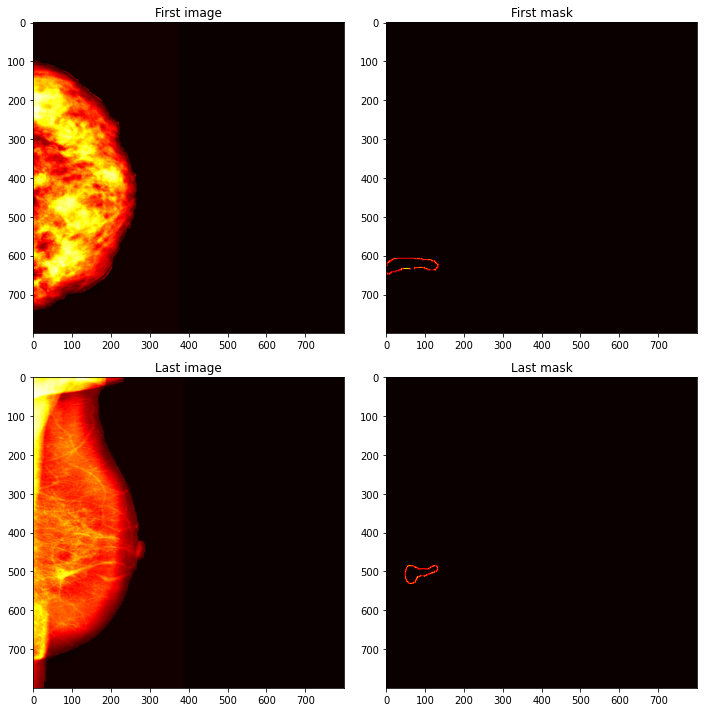

In [141]:
# Plot the first and last images
plt.figure(figsize = (10,10))
plt.subplot(221)
plt.imshow(np.squeeze(processed_img[0]), cmap = "hot")
plt.title('First image')
plt.subplot(222)
plt.imshow(np.squeeze(processed_mask[0]), cmap = "hot" )
plt.title('First mask')
plt.subplot(223)
plt.imshow(np.squeeze(processed_img[-1]), cmap = "hot")
plt.title('Last image')
plt.subplot(224)
plt.imshow(np.squeeze(processed_mask[-1]), cmap = "hot")
plt.title('Last mask')
plt.tight_layout()
plt.show()

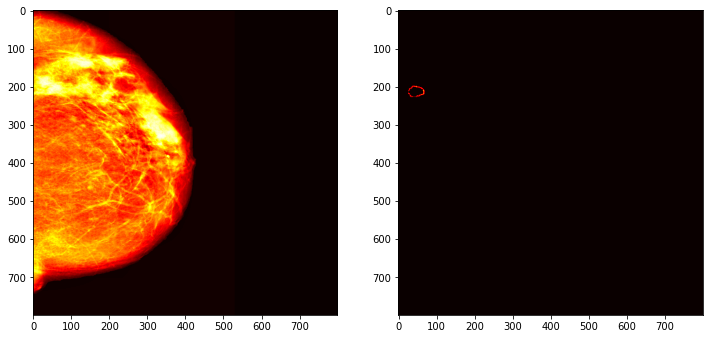

In [143]:
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.imshow(np.reshape(processed_img[2], (800, 800)), cmap='hot')
plt.subplot(122)
plt.imshow(np.reshape(processed_mask[2], (800, 800)), cmap='hot')
plt.show()

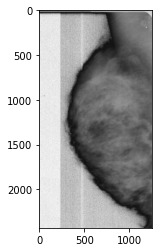

In [145]:
dd= cv2.imread(arr[1])
plt.imshow(dd, cmap="hot")

In [146]:
P00001_img = processed_img[2]
P00001_mask = processed_mask[2]

P00051_img = processed_img[75]
P00051_mask = processed_mask[75]

P00444_img = processed_img[99]
P00444_mask = processed_mask[99]

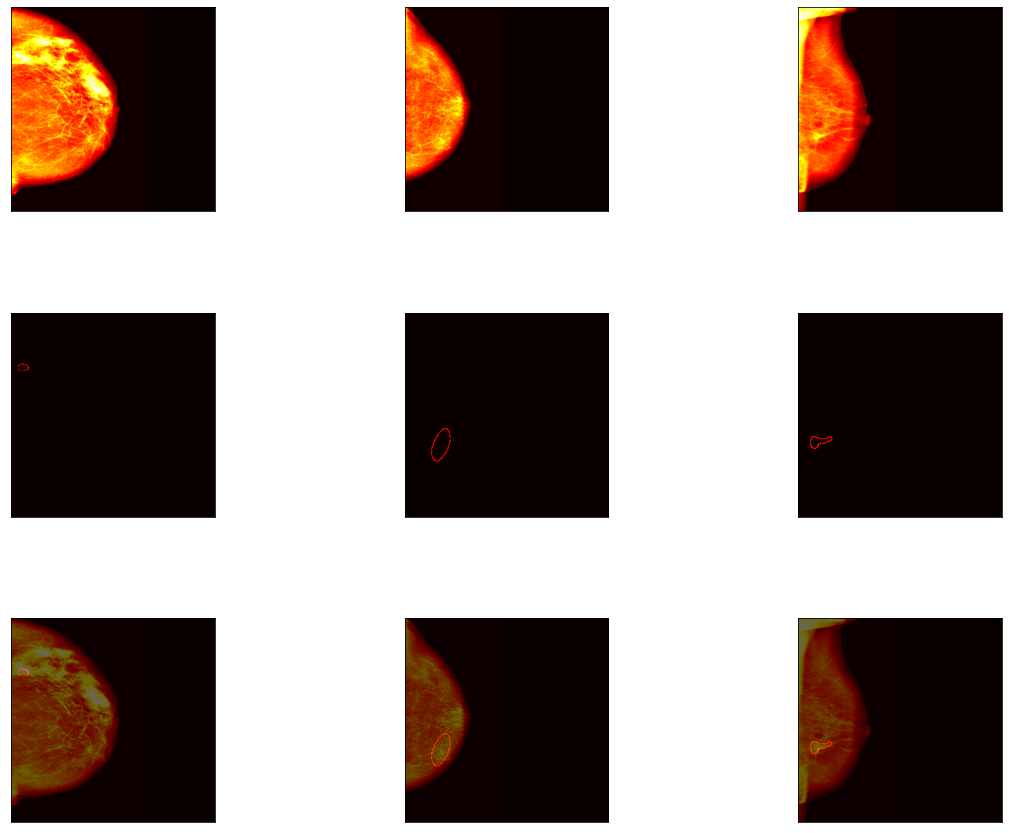

In [148]:
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(20, 15))

ax[0][0].imshow(P00001_img, cmap="hot")
ax[1][0].imshow(P00001_mask, cmap="hot")

ax[0][1].imshow(P00051_img, cmap="hot")
ax[1][1].imshow(P00051_mask, cmap="hot")

ax[0][2].imshow(P00444_img, cmap="hot")
ax[1][2].imshow(P00444_mask, cmap="hot")



P00001_mask_alpha = np.ma.masked_where(P00001_mask == 0, P00001_mask)
P00051_mask_alpha = np.ma.masked_where(P00051_mask == 0, P00051_mask)
P00444_mask_alpha = np.ma.masked_where(P00444_mask == 0, P00444_mask)

ax[2][0].imshow(P00001_img, cmap="hot")
ax[2][0].imshow(P00001_mask_alpha, cmap="hot", alpha=0.6)
# ax[2][0].imshow(P00001_mask_arr, cmap=true_cmap, alpha=0.4)

ax[2][1].imshow(P00051_img, cmap="hot")
ax[2][1].imshow(P00051_mask_alpha, cmap="hot", alpha=0.6)
# ax[2][1].imshow(P00051_mask_arr, cmap=true_cmap, alpha=0.7)

ax[2][2].imshow(P00444_img, cmap="hot", alpha= 1)
ax[2][2].imshow(P00444_mask_alpha, cmap="hot", alpha=0.6)
# ax[2][2].imshow(P00444_mask_arr, cmap=true_cmap, alpha=0.4)

for i, ax in enumerate(fig.axes):
    ax.xaxis.set_visible(False)
    ax.yaxis.set_visible(False)

plt.subplots_adjust(wspace=0.2, 
                    hspace=0.5)
plt.tight_layout

plt.show()


# plt.savefig("/Users/cleonwong/Google Drive/To-Share/mammogram_medium_article/Part1/show_mask.png", dpi=300, transparent=True)

In [195]:
# save_path=[]

# for i in range(len(arr)):
# #     img_path = df2["Full_Windows_Path"][i].replace("C:","D:")  
#     img_path= arr[i]
#     root= img_path.split('\\')[0:6]
#     drive= "D:\\"
#     folder= root[4]
    
#     category=img_path.split('\\')[7]
#     patient_no=img_path.split('\\')[8]
#     file_name=img_path.split('\\')[9]
#     path= os.path.join(drive, folder, category,patient_no)
#     save_path.append(path)